# **Import Library**

In [ ]:
pip install scikit-plot

In [ ]:
pip install lime

In [ ]:
pip install selenium pillow

In [ ]:
pip install scikit-fuzzy

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#standard Libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from collections import Counter
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn import tree

# **Import Dataset From Google Drive**



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Import Dataset From Local Folder**

In [ ]:
df1 = pd.read_excel('Data-v2.xlsx')

# **Shopping Behaviour Dataset 1**

In [ ]:
df1.head()

ID  Gender                Age   Ethnic   Occupation       Annual Income  \
0   1  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1   2    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2   3  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3   4    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4   5  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social Media usage Experience of purchasing due to social media influence  \
0                Yes                                                Yes       
1                Yes                                                Yes       
2                Yes                                                Yes       
3                Yes                                                Yes       
4                Yes                                                Yes       

  Reviews and rating impact on purchasing decision  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                               No   
4                                              Yes   

  Average time spent on the Internet (weekly)  ... Attitude 3 (ATTD3)  \
0                          More than 40 hours  ...            Neutral   
1                          More than 40 hours  ...              Agree   
2                         5 hours to 10 hours  ...  Strongly Disagree   
3                           1 hour to 4 hours  ...              Agree   
4                        10 hours to 20 hours  ...              Agree   

  Attitude 4 (ATTD4) Social Norms 1 (SN1) Social Norms 2 (SN2)  \
0            Neutral              Neutral              Neutral   
1            Neutral    Strongly Disagree             Disagree   
2           Disagree    Strongly Disagree    Strongly Disagree   
3            Neutral              Neutral              Neutral   
4              Agree              Neutral             Disagree   

  Social Norms 3 (SN3) Social Norms 4 (SN4)  \
0              Neutral              Neutral   
1                Agree              Neutral   
2    Strongly Disagree    Strongly Disagree   
3                Agree                Agree   
4              Neutral              Neutral   

  Perceived Behavioural Control 1 (PBC1)  \
0                                Neutral   
1                                Neutral   
2                      Strongly Disagree   
3                                Neutral   
4                                Neutral   

  Perceived Behavioural Control 2 (PBC2)  \
0                                Neutral   
1                                  Agree   
2                      Strongly Disagree   
3                                  Agree   
4                                  Agree   

  Perceived Behavioural Control 3 (PBC3)  \
0                                Neutral   
1                               Disagree   
2                      Strongly Disagree   
3                                Neutral   
4                                  Agree   

  Perceived Behavioural Control 4 (PBC4)  
0                                Neutral  
1                               Disagree  
2                      Strongly Disagree  
3                                  Agree  
4                                  Agree  

[5 rows x 27 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   ID                                                      311 non-null    int64 
 1   Gender                                                  311 non-null    object
 2   Age                                                     311 non-null    object
 3   Ethnic                                                  311 non-null    object
 4   Occupation                                              311 non-null    object
 5   Annual Income                                           311 non-null    object
 6   Social Media usage                                      311 non-null    object
 7   Experience of purchasing due to social media influence  311 non-null    object
 8   Reviews and rating impact on purchasing decision  

In [ ]:
df1.columns

Index(['ID', 'Gender', 'Age', 'Ethnic', 'Occupation', 'Annual Income',
       'Social Media usage',
       'Experience of purchasing due to social media influence',
       'Reviews and rating impact on purchasing decision',
       'Average time spent on the Internet (weekly)',
       'Attention to advertisement on social media',
       'Purchase Behaviour 1 (PB1)', 'Purchase Behaviour 2 (PB2)',
       'Purchase Behaviour 3 (PB3)', 'Purchase Behaviour 4 (PB4)',
       'Attitude 1 (ATTD1)', 'Attitude 2 (ATTD2)', 'Attitude 3 (ATTD3)',
       'Attitude 4 (ATTD4)', 'Social Norms 1 (SN1)', 'Social Norms 2 (SN2)',
       'Social Norms 3 (SN3)', 'Social Norms 4 (SN4)',
       'Perceived Behavioural Control 1 (PBC1)',
       'Perceived Behavioural Control 2 (PBC2)',
       'Perceived Behavioural Control 3 (PBC3)',
       'Perceived Behavioural Control 4 (PBC4)'],
      dtype='object')

In [ ]:
df1.shape

(311, 27)

In [ ]:
df1.isnull().sum()

ID                                                        0
Gender                                                    0
Age                                                       0
Ethnic                                                    0
Occupation                                                0
Annual Income                                             0
Social Media usage                                        0
Experience of purchasing due to social media influence    0
Reviews and rating impact on purchasing decision          0
Average time spent on the Internet (weekly)               0
Attention to advertisement on social media                0
Purchase Behaviour 1 (PB1)                                0
Purchase Behaviour 2 (PB2)                                0
Purchase Behaviour 3 (PB3)                                0
Purchase Behaviour 4 (PB4)                                0
Attitude 1 (ATTD1)                                        0
Attitude 2 (ATTD2)                      

In [ ]:
#droping the column ID since it's not important
df1 = df1.drop(['ID'],axis=1)
df1.head()

Gender                Age   Ethnic   Occupation       Annual Income  \
0  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social Media usage Experience of purchasing due to social media influence  \
0                Yes                                                Yes       
1                Yes                                                Yes       
2                Yes                                                Yes       
3                Yes                                                Yes       
4                Yes                                                Yes       

  Reviews and rating impact on purchasing decision  \
0                                              Yes   
1                                              Yes   
2                                              Yes   
3                                               No   
4                                              Yes   

  Average time spent on the Internet (weekly)  \
0                          More than 40 hours   
1                          More than 40 hours   
2                         5 hours to 10 hours   
3                           1 hour to 4 hours   
4                        10 hours to 20 hours   

  Attention to advertisement on social media  ... Attitude 3 (ATTD3)  \
0                                        Yes  ...            Neutral   
1                                        Yes  ...              Agree   
2                                         No  ...  Strongly Disagree   
3                                        Yes  ...              Agree   
4                                         No  ...              Agree   

  Attitude 4 (ATTD4) Social Norms 1 (SN1) Social Norms 2 (SN2)  \
0            Neutral              Neutral              Neutral   
1            Neutral    Strongly Disagree             Disagree   
2           Disagree    Strongly Disagree    Strongly Disagree   
3            Neutral              Neutral              Neutral   
4              Agree              Neutral             Disagree   

  Social Norms 3 (SN3) Social Norms 4 (SN4)  \
0              Neutral              Neutral   
1                Agree              Neutral   
2    Strongly Disagree    Strongly Disagree   
3                Agree                Agree   
4              Neutral              Neutral   

  Perceived Behavioural Control 1 (PBC1)  \
0                                Neutral   
1                                Neutral   
2                      Strongly Disagree   
3                                Neutral   
4                                Neutral   

  Perceived Behavioural Control 2 (PBC2)  \
0                                Neutral   
1                                  Agree   
2                      Strongly Disagree   
3                                  Agree   
4                                  Agree   

  Perceived Behavioural Control 3 (PBC3)  \
0                                Neutral   
1                               Disagree   
2                      Strongly Disagree   
3                                Neutral   
4                                  Agree   

  Perceived Behavioural Control 4 (PBC4)  
0                                Neutral  
1                               Disagree  
2                      Strongly Disagree  
3                                  Agree  
4                                  Agree  

[5 rows x 26 columns]

Summary statistics:
       Gender                Age   Ethnic Occupation       Annual Income  \
count     311                311      311        311                 311   
unique      2                  5        5          5                  10   
top      Male  23 - 28 Years Old  Chinese    Student  More than RM90,001   
freq      157                118      180        127                  51   

       Social Media usage  \
count                 311   
unique                  2   
top                   Yes   
freq                  297   

       Experience of purchasing due to social media influence  \
count                                                 311       
unique                                                  2       
top                                                   Yes       
freq                                                  282       

       Reviews and rating impact on purchasing decision  \
count                                               311   
unique   

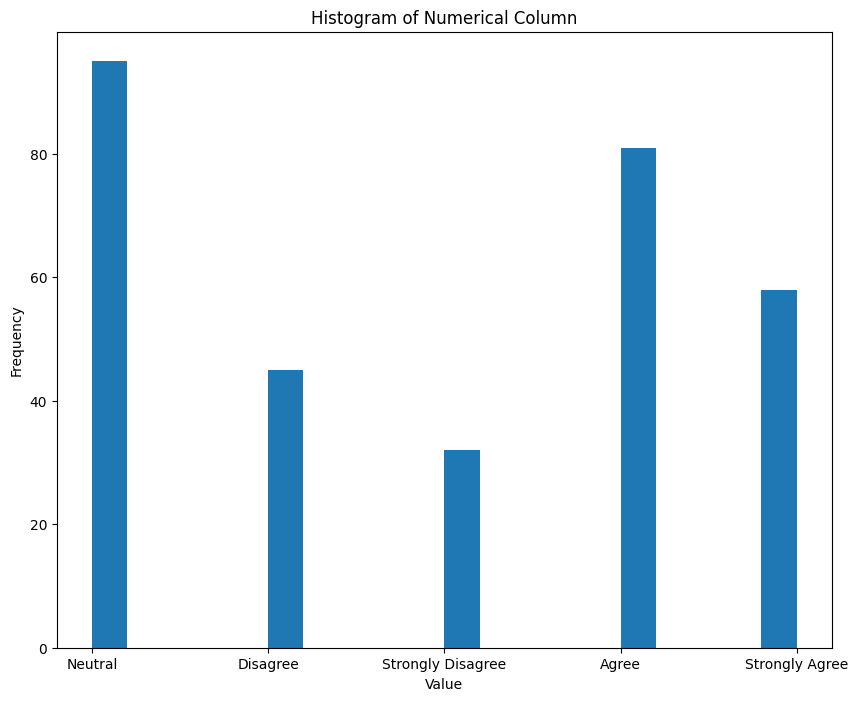

In [ ]:
# For example, calculate summary statistics
print("Summary statistics:")
print(df1.describe())

# Visualize the data (optional)
# For example, create a histogram of a numerical column
import matplotlib.pyplot as plt
plt.hist(df1['Perceived Behavioural Control 4 (PBC4)'], bins=20)
plt.title("Histogram of Numerical Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df1.nunique()

Gender                                                     2
Age                                                        5
Ethnic                                                     5
Occupation                                                 5
Annual Income                                             10
Social Media usage                                         2
Experience of purchasing due to social media influence     2
Reviews and rating impact on purchasing decision           2
Average time spent on the Internet (weekly)                5
Attention to advertisement on social media                 2
Purchase Behaviour 1 (PB1)                                 5
Purchase Behaviour 2 (PB2)                                 5
Purchase Behaviour 3 (PB3)                                 5
Purchase Behaviour 4 (PB4)                                 5
Attitude 1 (ATTD1)                                         5
Attitude 2 (ATTD2)                                         5
Attitude 3 (ATTD3)      

In [ ]:
df1.rename(columns={'Annual Income': 'Annual_Income', 'Social Media usage': 'Social_Media_usage', 'Experience of purchasing due to social media influence': 'Experience', 'Reviews and rating impact on purchasing decision': 'Reviews_and_rating', 'Average time spent on the Internet (weekly)': 'ATI', 'Attention to advertisement on social media': 'ADSM', 'Purchase Behaviour 1 (PB1)': 'PB1', 'Purchase Behaviour 2 (PB2)': 'PB2', 'Purchase Behaviour 3 (PB3)': 'PB3', 'Purchase Behaviour 4 (PB4)': 'PB4', 'Attitude 1 (ATTD1)': 'ATTD1', 'Attitude 2 (ATTD2)': 'ATTD2', 'Attitude 3 (ATTD3)': 'ATTD3', 'Attitude 4 (ATTD4)': 'ATTD4', 'Social Norms 1 (SN1)': 'SN1', 'Social Norms 2 (SN2)': 'SN2', 'Social Norms 3 (SN3)': 'SN3', 'Social Norms 4 (SN4)': 'SN4', 'Perceived Behavioural Control 1 (PBC1)': 'PBC1', 'Perceived Behavioural Control 2 (PBC2)': 'PBC2', 'Perceived Behavioural Control 3 (PBC3)': 'PBC3', 'Perceived Behavioural Control 4 (PBC4)': 'PBC4', }, inplace=True, errors='raise')

In [ ]:
df1.head()

Gender                Age   Ethnic   Occupation       Annual_Income  \
0  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social_Media_usage Experience Reviews_and_rating                   ATI ADSM  \
0                Yes        Yes                Yes    More than 40 hours  Yes   
1                Yes        Yes                Yes    More than 40 hours  Yes   
2                Yes        Yes                Yes   5 hours to 10 hours   No   
3                Yes        Yes                 No     1 hour to 4 hours  Yes   
4                Yes        Yes                Yes  10 hours to 20 hours   No   

   ...              ATTD3     ATTD4                SN1                SN2  \
0  ...            Neutral   Neutral            Neutral            Neutral   
1  ...              Agree   Neutral  Strongly Disagree           Disagree   
2  ...  Strongly Disagree  Disagree  Strongly Disagree  Strongly Disagree   
3  ...              Agree   Neutral            Neutral            Neutral   
4  ...              Agree     Agree            Neutral           Disagree   

                 SN3                SN4               PBC1               PBC2  \
0            Neutral            Neutral            Neutral            Neutral   
1              Agree            Neutral            Neutral              Agree   
2  Strongly Disagree  Strongly Disagree  Strongly Disagree  Strongly Disagree   
3              Agree              Agree            Neutral              Agree   
4            Neutral            Neutral            Neutral              Agree   

                PBC3               PBC4  
0            Neutral            Neutral  
1           Disagree           Disagree  
2  Strongly Disagree  Strongly Disagree  
3            Neutral              Agree  
4              Agree              Agree  

[5 rows x 26 columns]

In [ ]:
df1.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df1.Age.unique()

array(['29 - 34 Years Old', '23 - 28 Years Old', '35 - 40 Years Old',
       '17 - 22 Years Old', 'Others'], dtype=object)

In [ ]:
df1.Ethnic.unique()

array(['Chinese', 'Malay', 'Indian', 'Others', 'Bangladeshi'],
      dtype=object)

In [ ]:
df1.Occupation.unique()

array(['Homemaker', 'Student', 'Businessman', 'Employee', 'Retired'],
      dtype=object)

In [ ]:
df1.Annual_Income.unique()

array(['RM50,001-RM70,000', 'Less than RM30,000', 'More than RM90,001',
       'RM70,001-RM90,000', 'RM30,001-RM50,000', 'Less than 10,000 Taka',
       '10,001-20,000 Taka', '20,001-30,000 Taka',
       'More than 50,000 taka', '30,001-50,000 Taka'], dtype=object)

In [ ]:
df1.Social_Media_usage.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df1.Experience.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df1.Reviews_and_rating.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df1.ATI.unique()

array(['More than 40 hours', '5 hours to 10 hours', '1 hour to 4 hours',
       '10 hours to 20 hours', '20 hours to 40 hours'], dtype=object)

In [ ]:
df1.ADSM.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df1.PB1.unique()

array(['Neutral', 'Agree', 'Strongly Disagree', 'Strongly Agree',
       'Disagree'], dtype=object)

In [ ]:
df1.PB2.unique()

array(['Neutral', 'Agree', 'Strongly Disagree', 'Strongly Agree',
       'Disagree'], dtype=object)

In [ ]:
df1.PB3.unique()

array(['Neutral', 'Disagree', 'Strongly Disagree', 'Agree',
       'Strongly Agree'], dtype=object)

In [ ]:
df1.PB4.unique()

array(['Neutral', 'Strongly Agree', 'Disagree', 'Agree',
       'Strongly Disagree'], dtype=object)

In [ ]:
df1.ATTD1.unique()
df1.ATTD2.unique()
df1.ATTD3.unique()
df1.ATTD4.unique()

array(['Neutral', 'Disagree', 'Agree', 'Strongly Agree',
       'Strongly Disagree'], dtype=object)

In [ ]:
df1.SN1.unique()
df1.SN2.unique()
df1.SN3.unique()
df1.SN4.unique()

array(['Neutral', 'Strongly Disagree', 'Agree', 'Strongly Agree',
       'Disagree'], dtype=object)

In [ ]:
df1.PBC1.unique()
df1.PBC2.unique()
df1.PBC3.unique()
df1.PBC4.unique()

array(['Neutral', 'Disagree', 'Strongly Disagree', 'Agree',
       'Strongly Agree'], dtype=object)

In [ ]:
df1.describe()

Gender                Age   Ethnic Occupation       Annual_Income  \
count     311                311      311        311                 311   
unique      2                  5        5          5                  10   
top      Male  23 - 28 Years Old  Chinese    Student  More than RM90,001   
freq      157                118      180        127                  51   

       Social_Media_usage Experience Reviews_and_rating                  ATI  \
count                 311        311                311                  311   
unique                  2          2                  2                    5   
top                   Yes        Yes                Yes  5 hours to 10 hours   
freq                  297        282                262                   75   

       ADSM  ...  ATTD3  ATTD4      SN1      SN2      SN3      SN4     PBC1  \
count   311  ...    311    311      311      311      311      311      311   
unique    2  ...      5      5        5        5        5        5        5   
top     Yes  ...  Agree  Agree  Neutral  Neutral  Neutral  Neutral  Neutral   
freq    199  ...    106    112       87       90      102       93       84   

         PBC2     PBC3     PBC4  
count     311      311      311  
unique      5        5        5  
top     Agree  Neutral  Neutral  
freq      100       91       95  

[4 rows x 26 columns]

Distributions

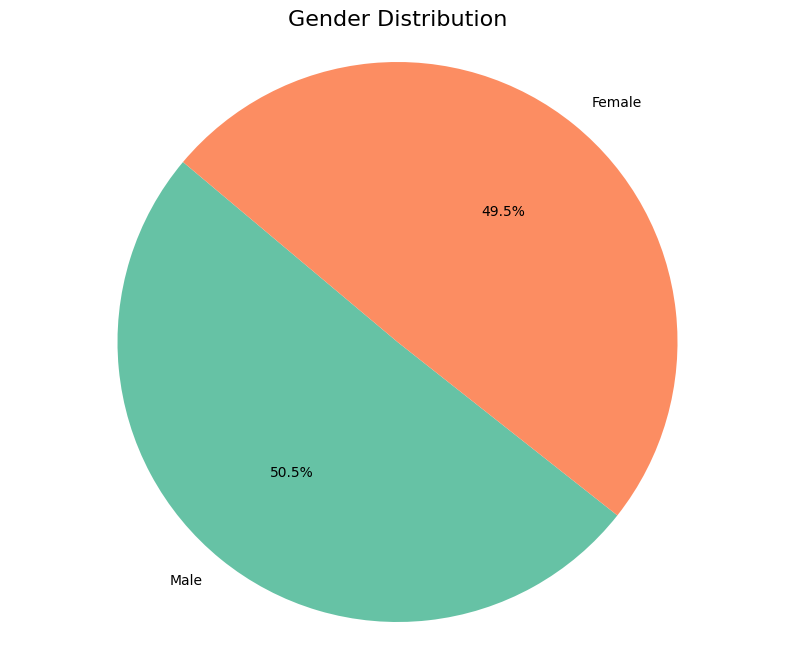

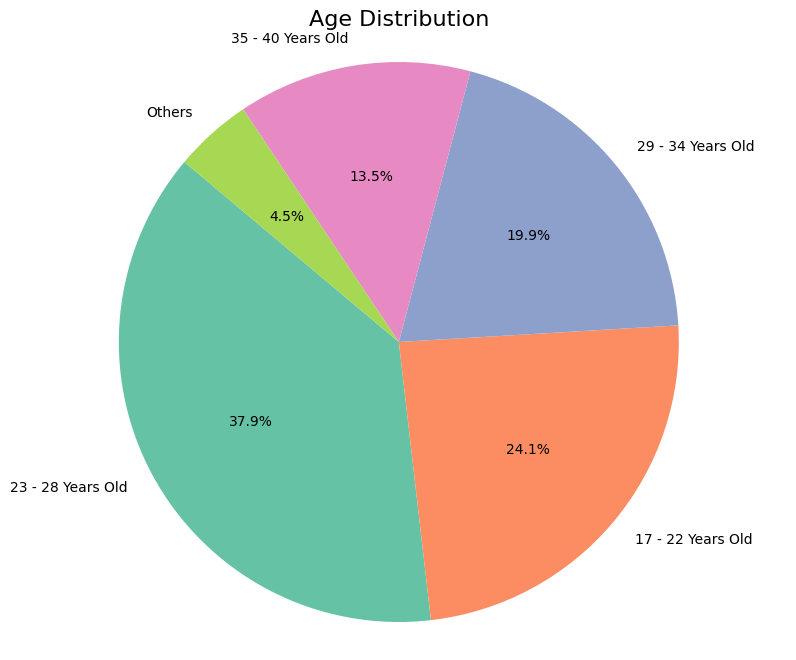

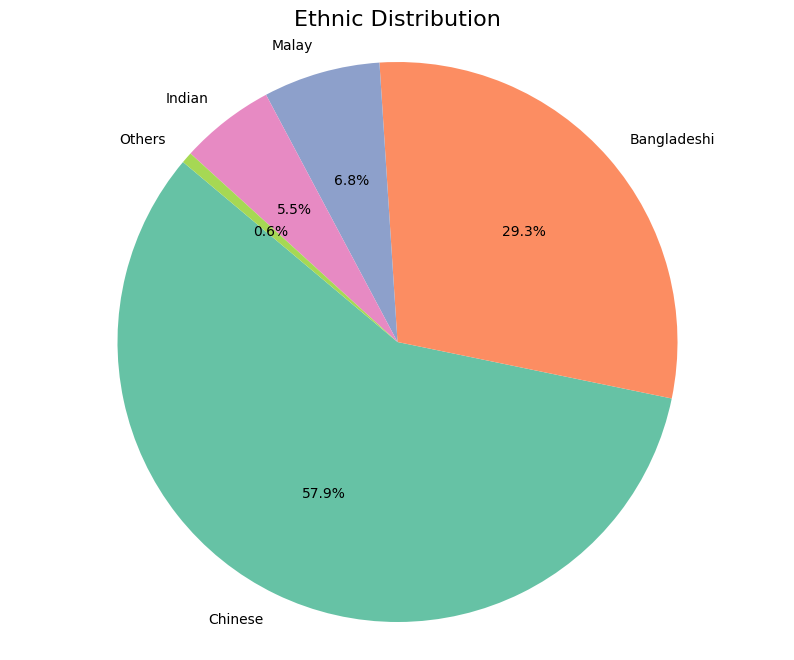

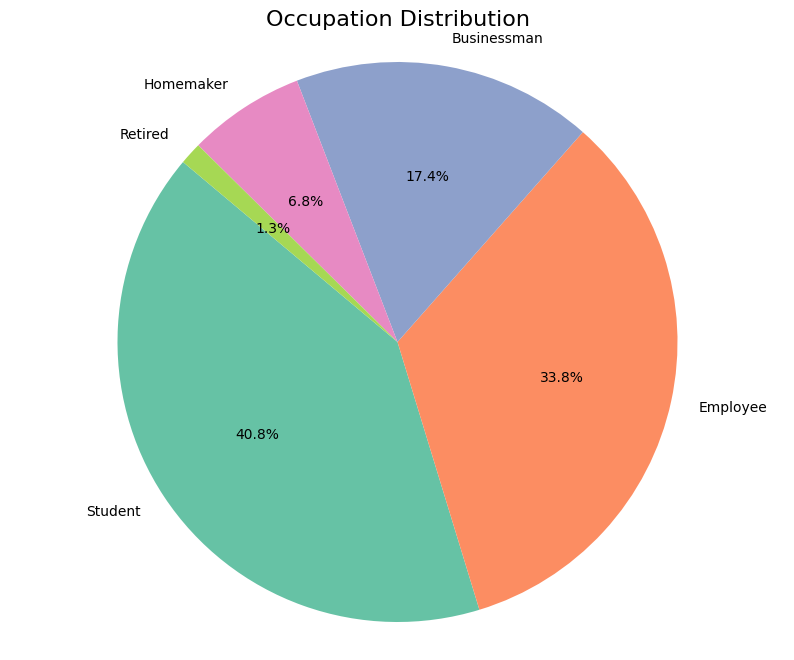

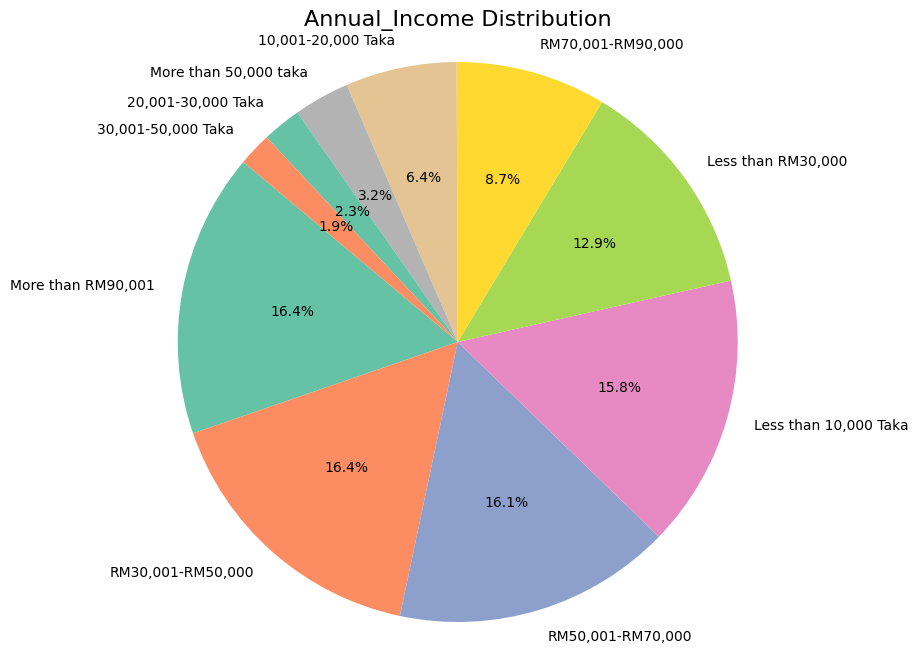

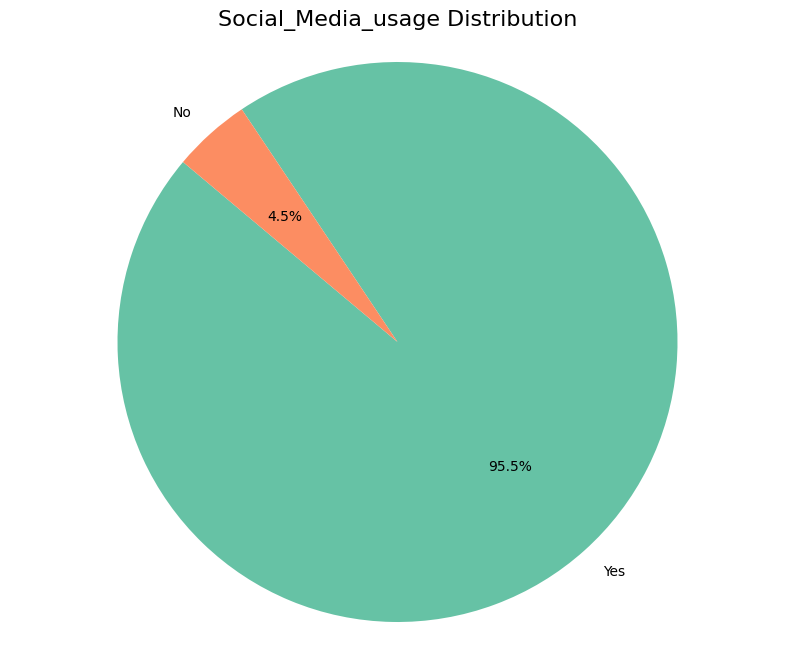

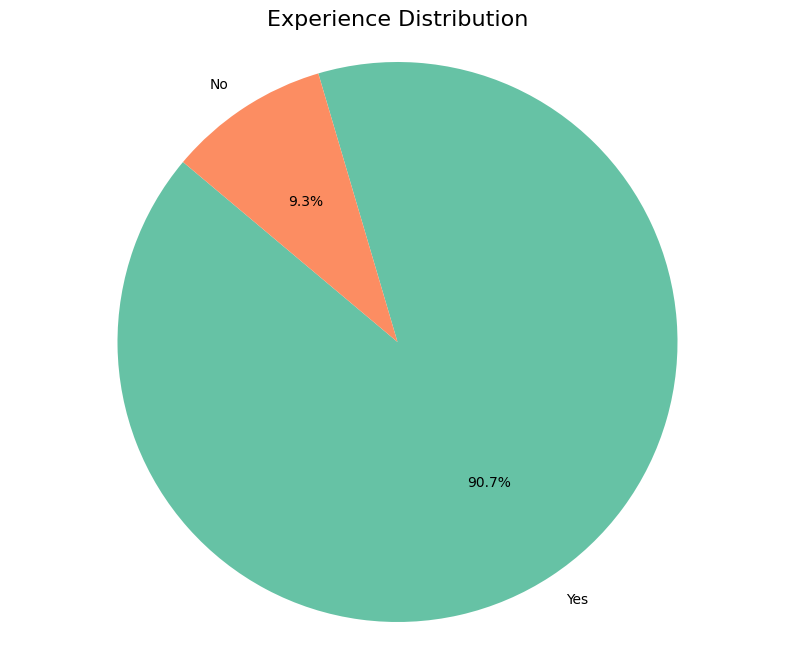

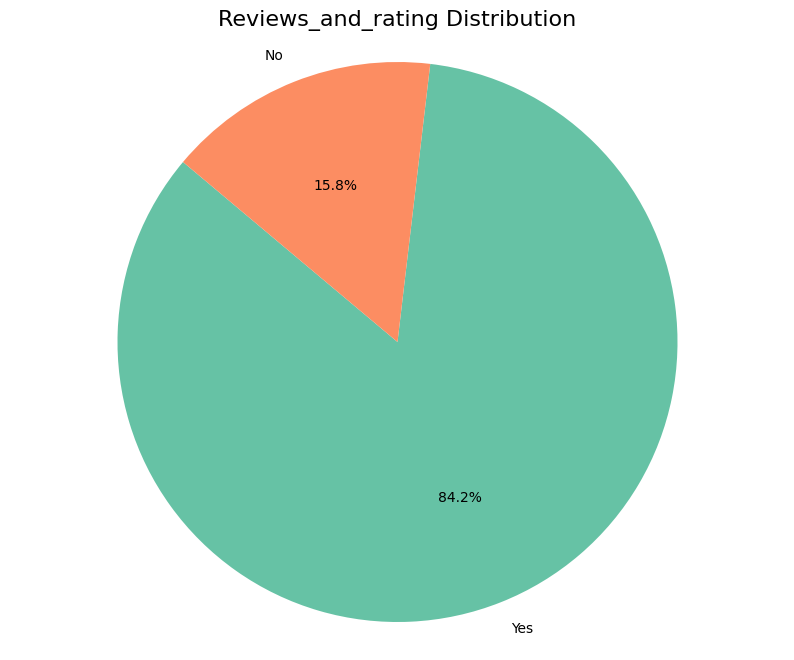

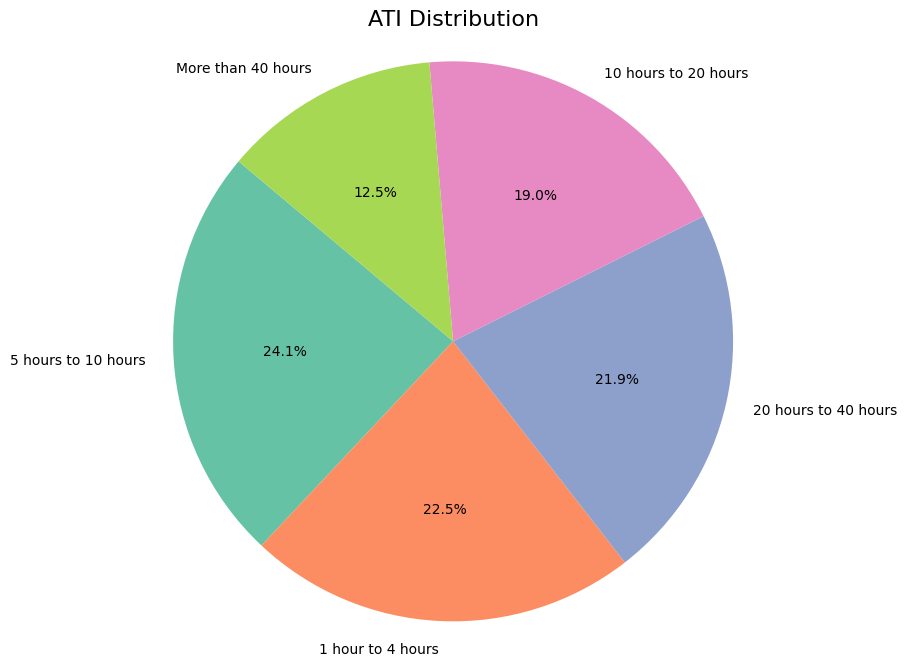

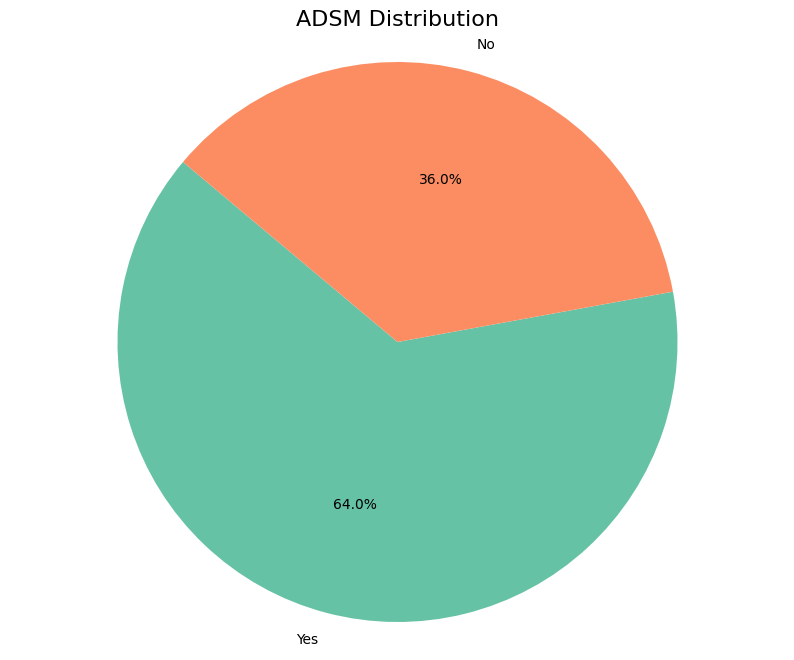

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['Gender', 'Age', 'Ethnic','Occupation', 'Annual_Income', 'Social_Media_usage', 'Experience', 'Reviews_and_rating', 'ATI', 'ADSM']

for f in features:
    plt.figure(figsize=(10,8)) # Larger figure size for better visibility

    # Calculate counts and convert to percentage
    counts = df1[f].value_counts(normalize=True) * 100

    # Plotting pie chart with percentage labels
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'{f} Distribution', fontsize=16) # Add a title to the plot

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    plt.show()

Visualisation

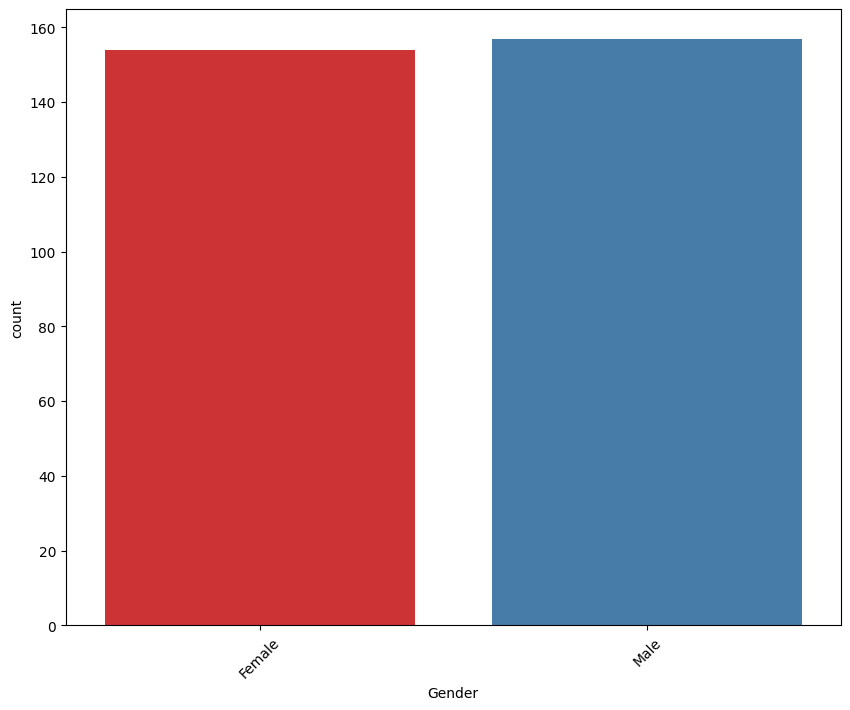

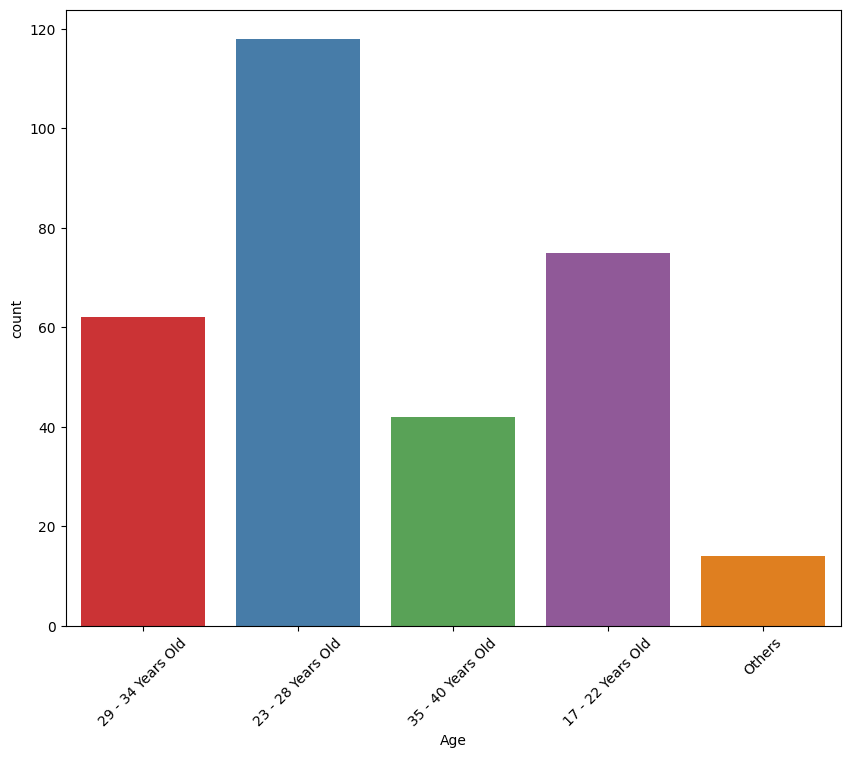

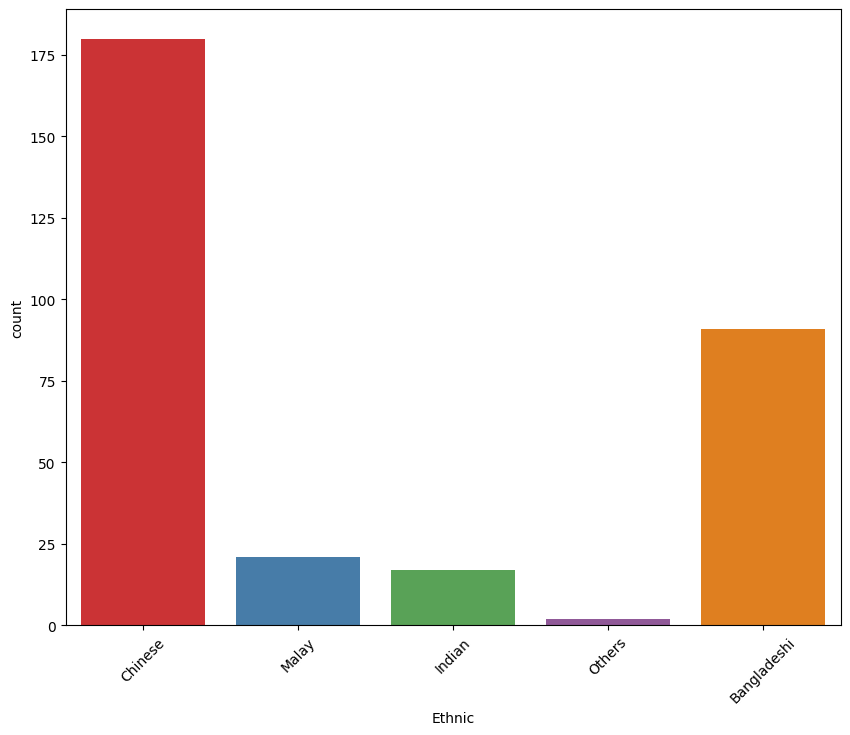

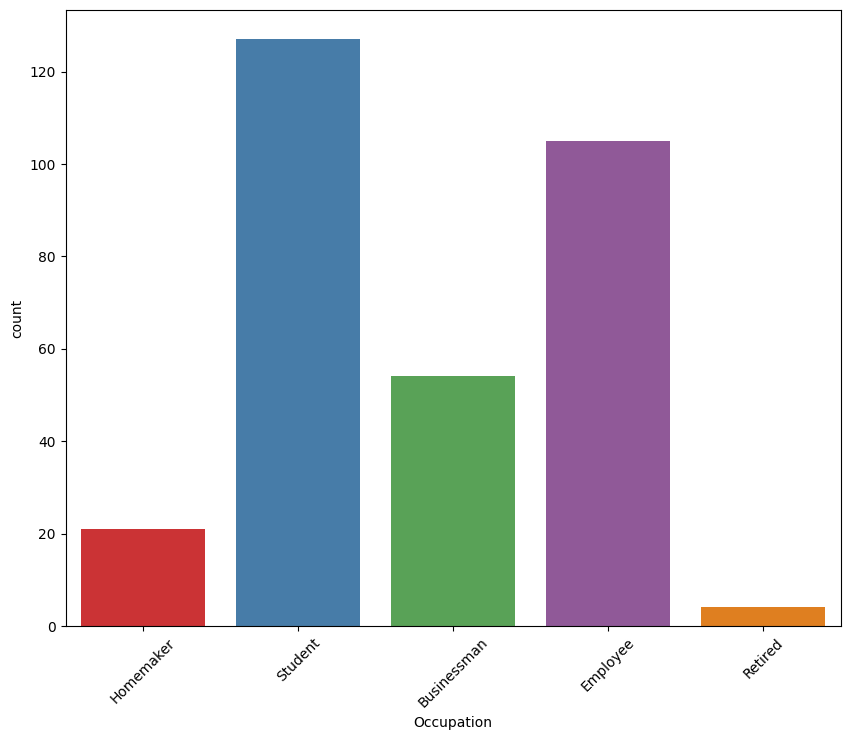

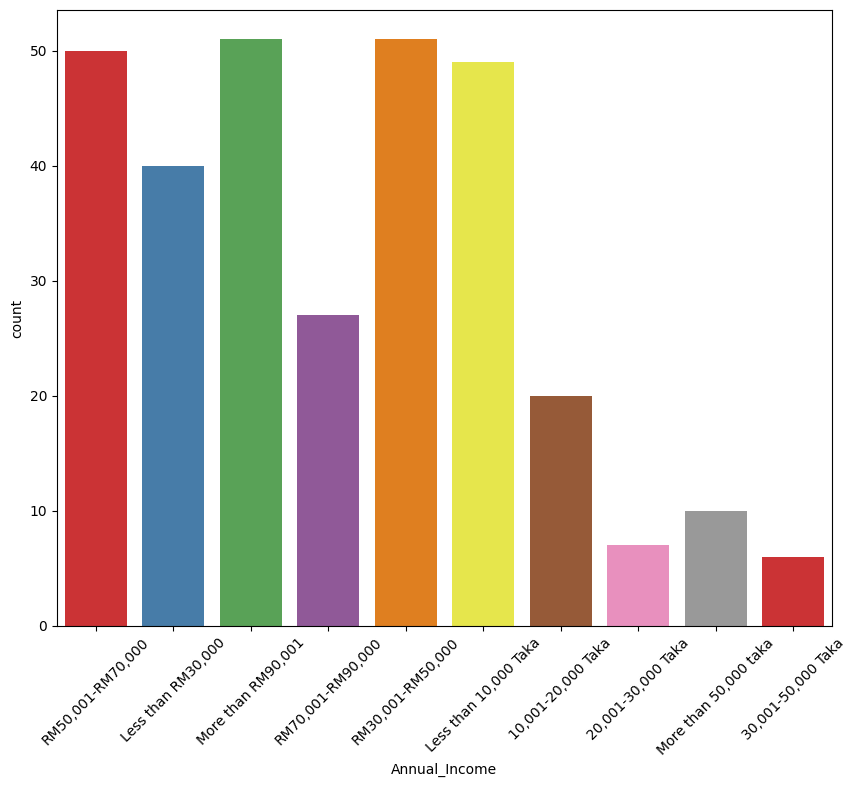

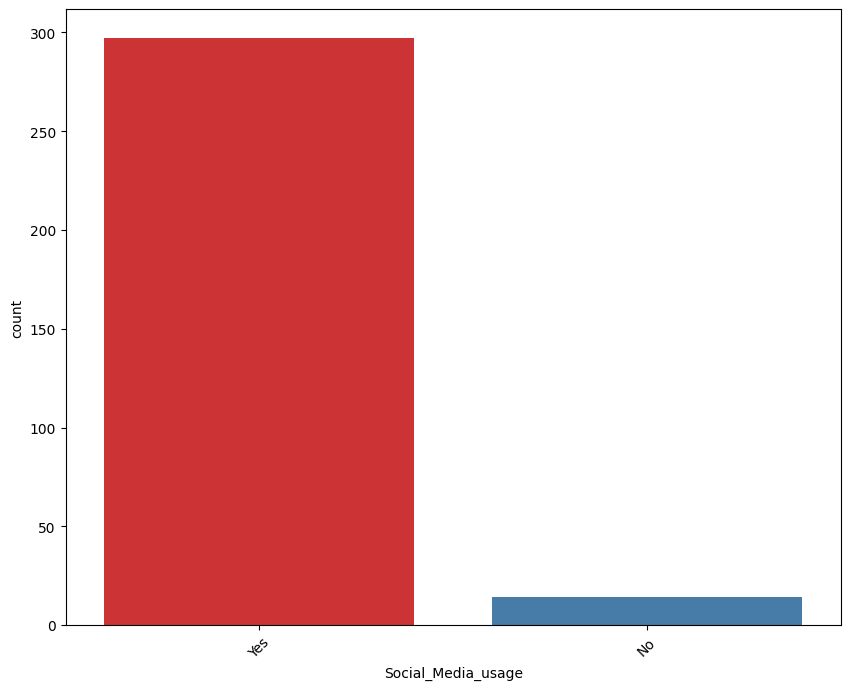

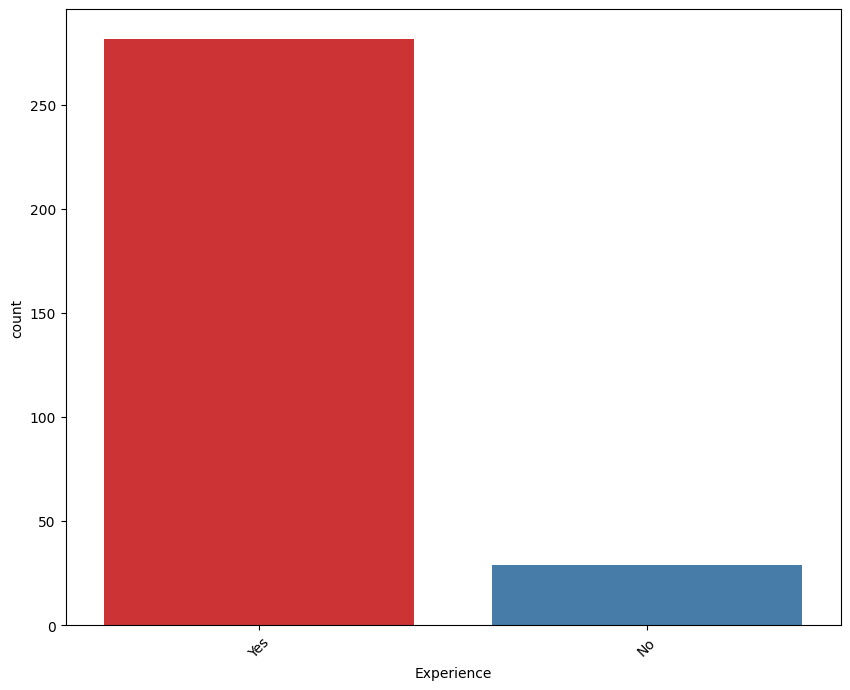

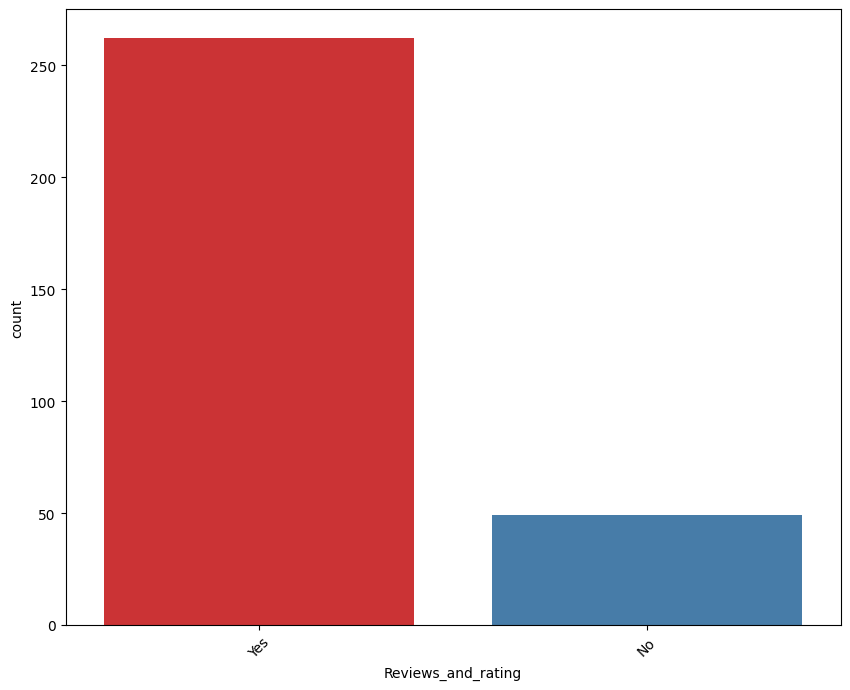

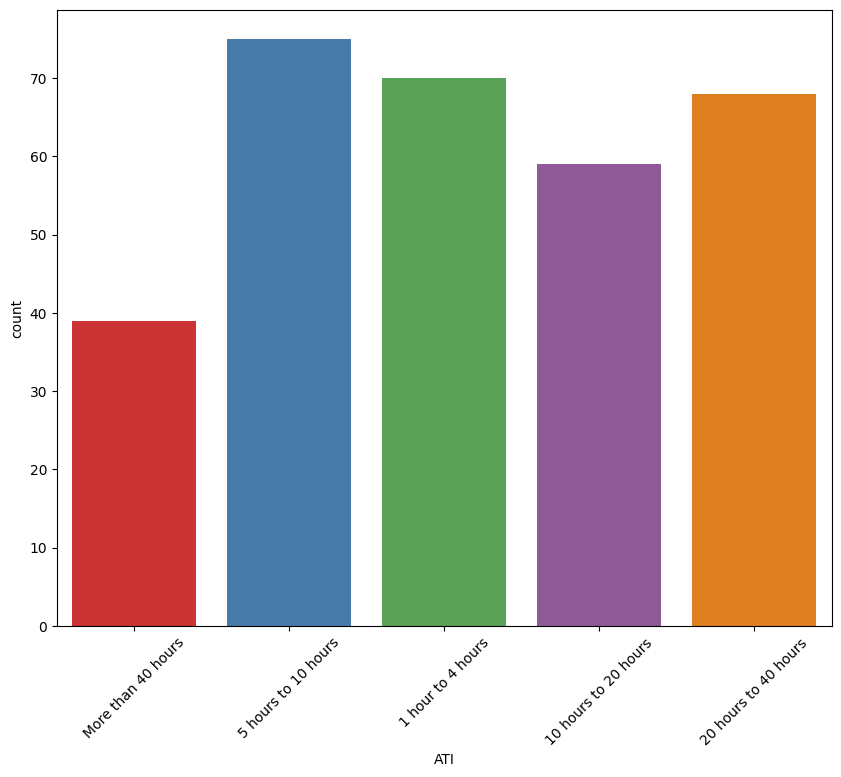

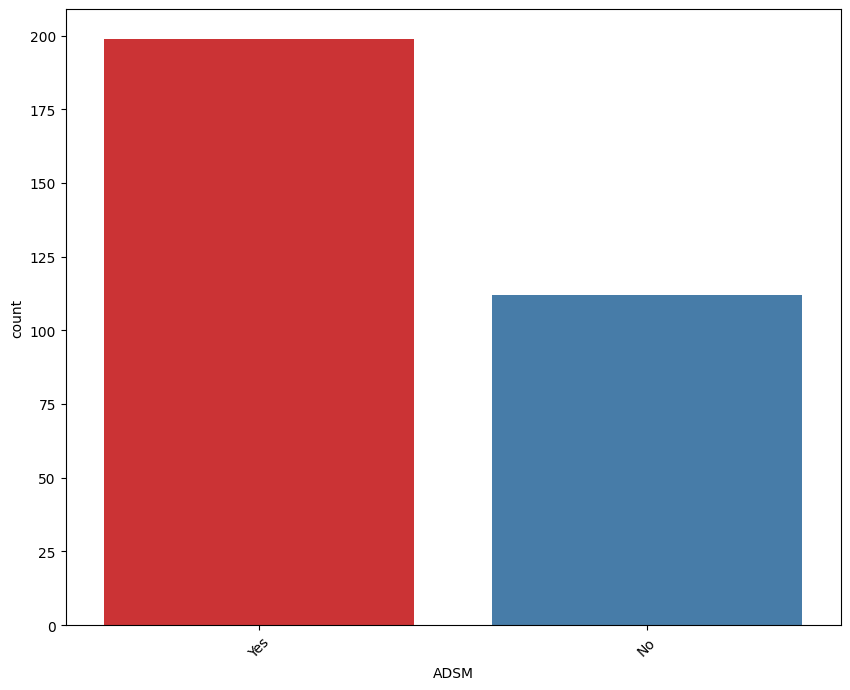

In [ ]:
features = ['Gender', 'Age', 'Ethnic','Occupation', 'Annual_Income', 'Social_Media_usage', 'Experience', 'Reviews_and_rating', 'ATI', 'ADSM' ]

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set1')
    plt.xticks(rotation=45)
    plt.show()

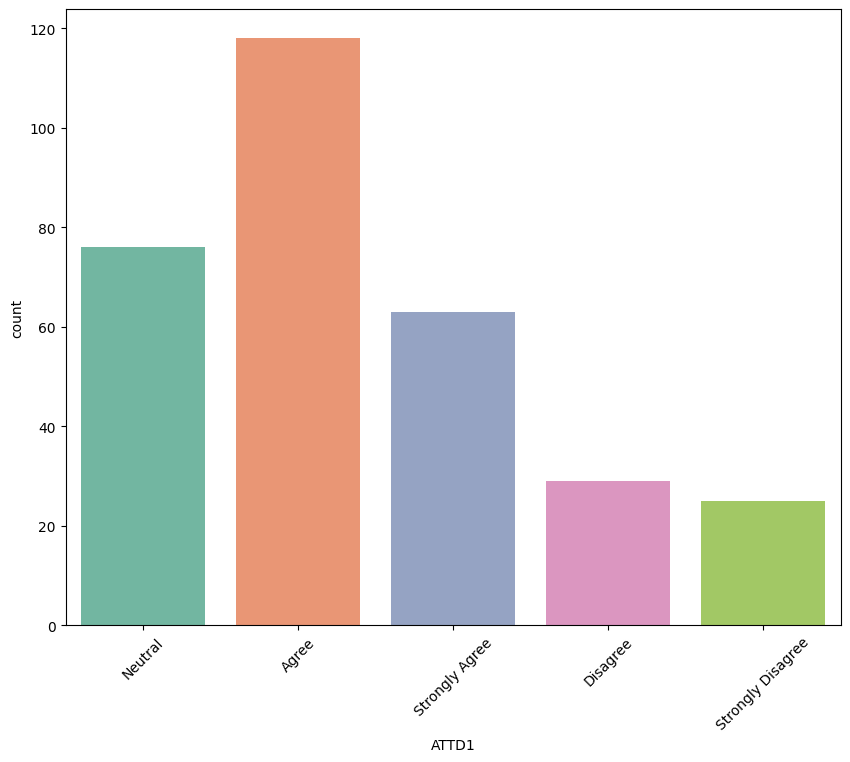

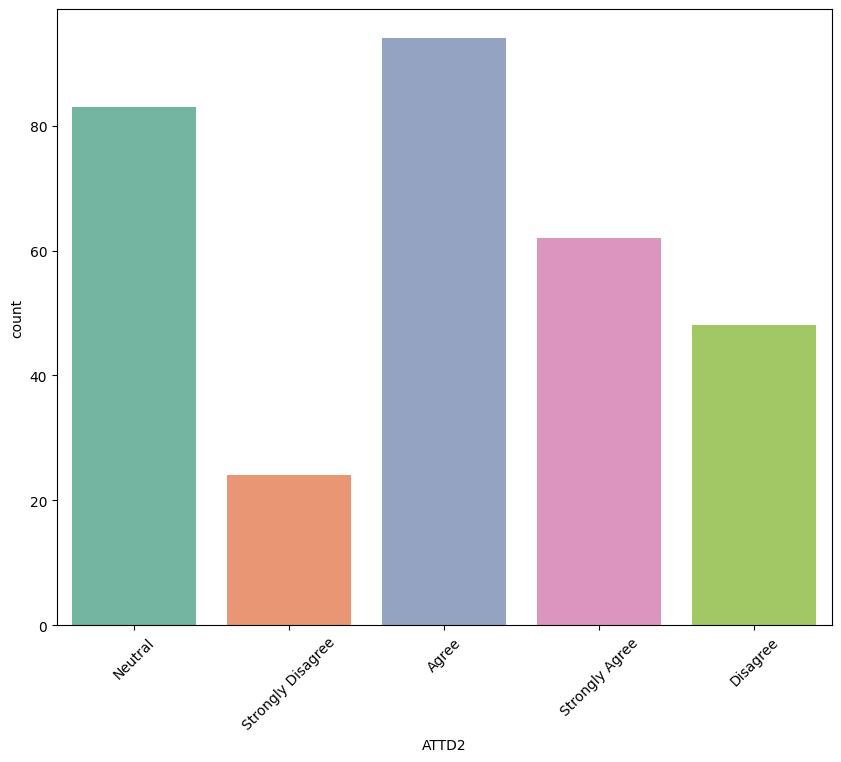

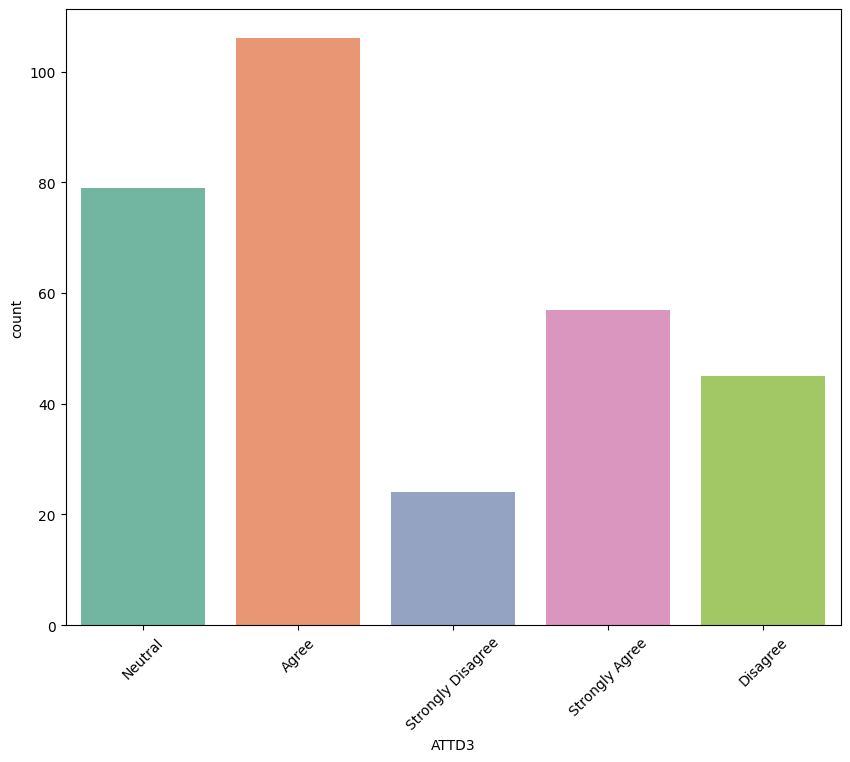

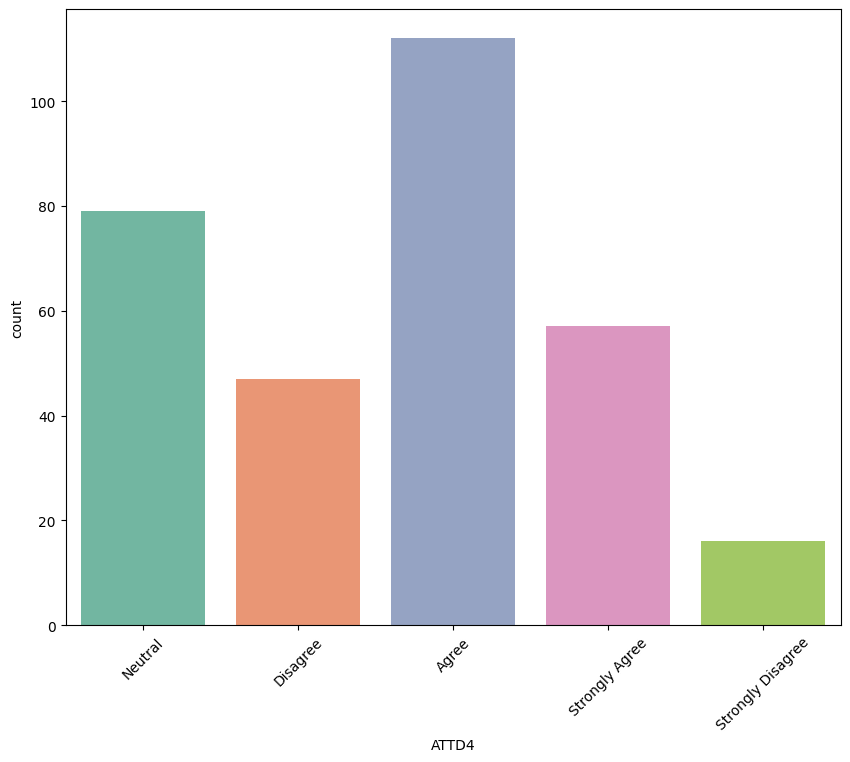

In [ ]:
#count plot of Attitude (ATTD)
features = [ 'ATTD1','ATTD2','ATTD3','ATTD4']

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

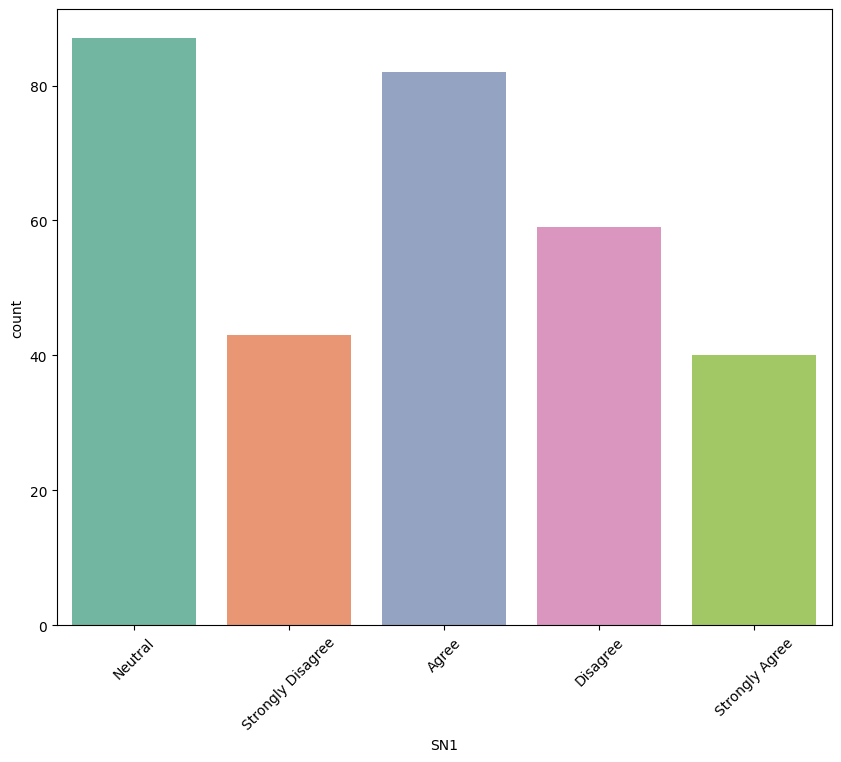

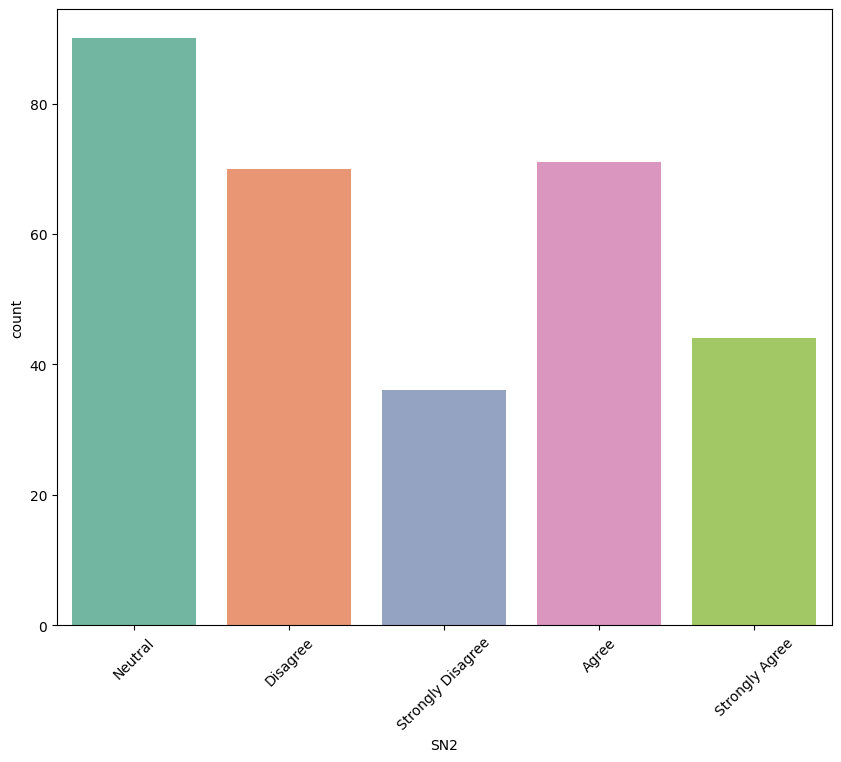

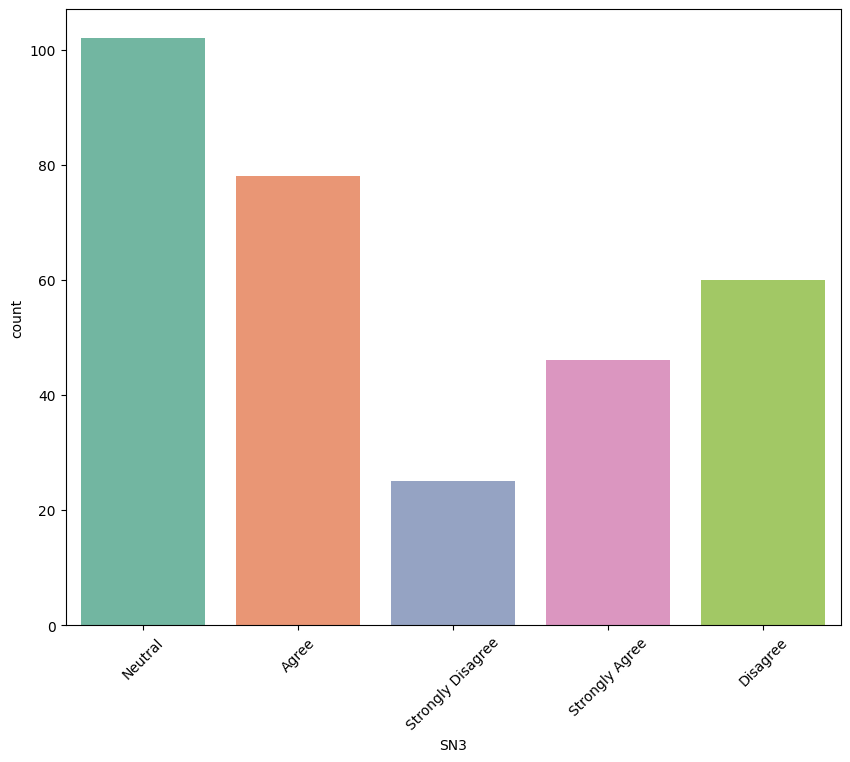

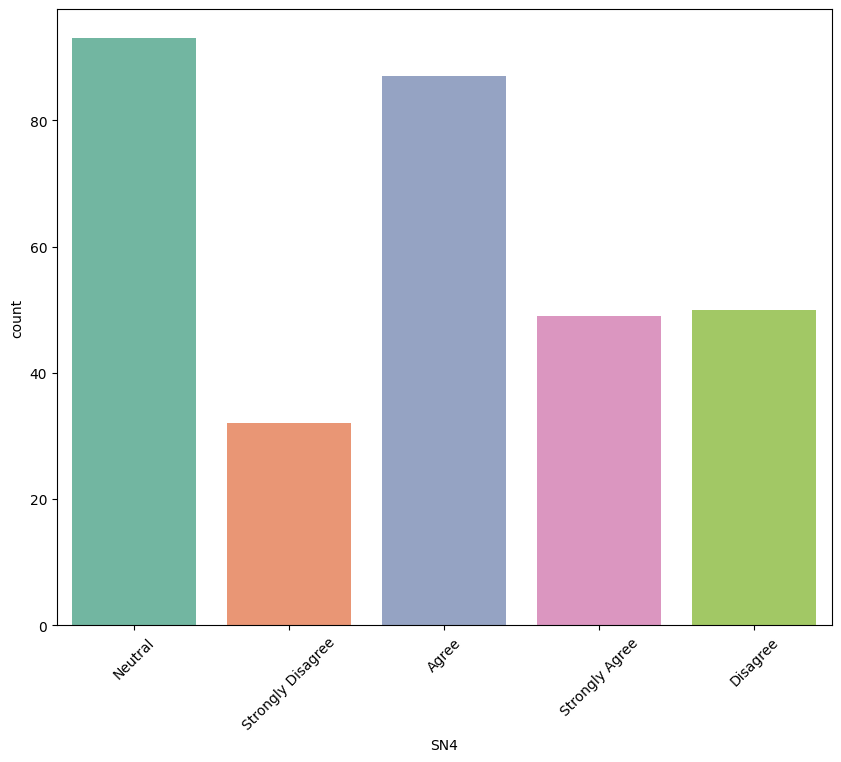

In [ ]:
#count plot of Social Norms (SN)
features = [ 'SN1','SN2','SN3','SN4']

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

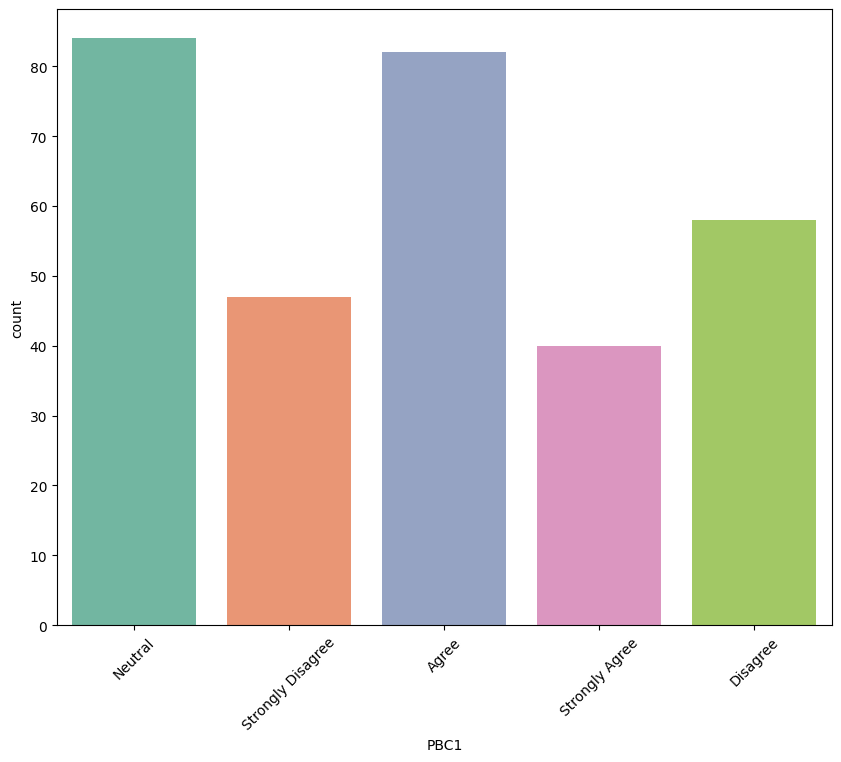

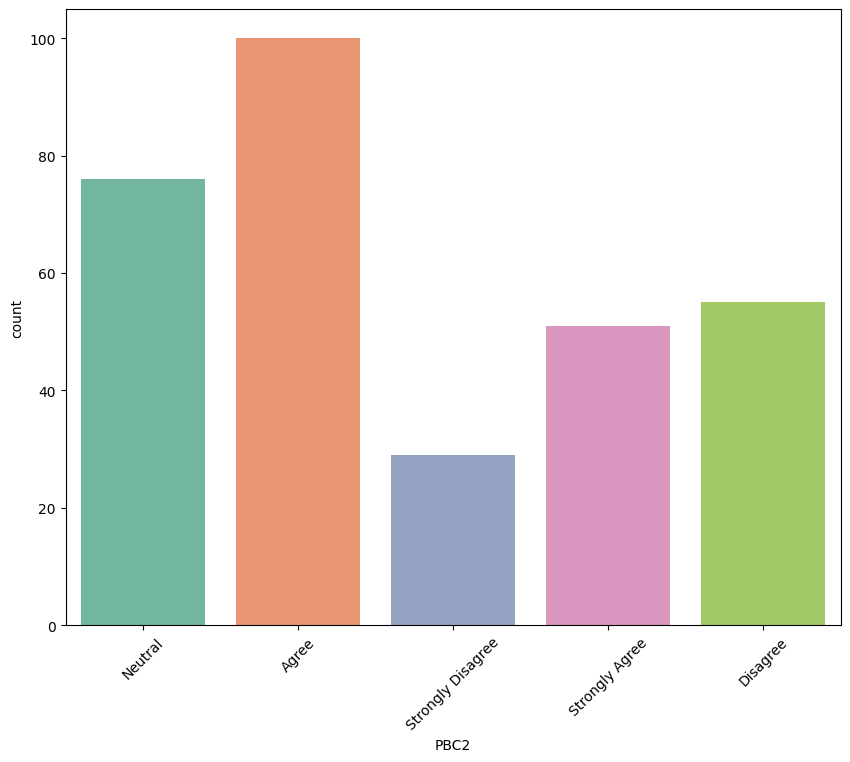

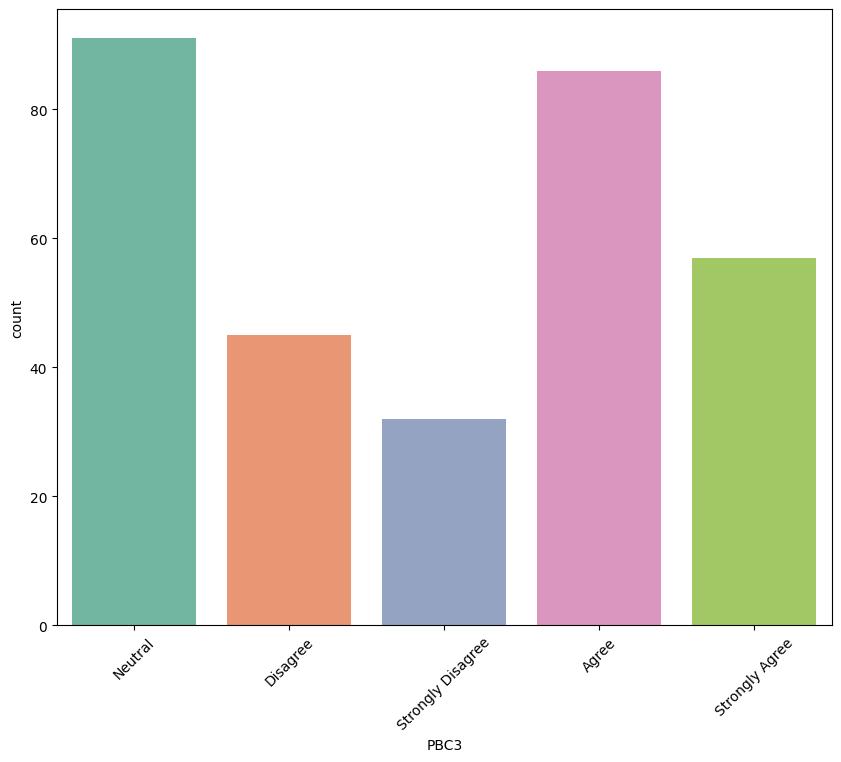

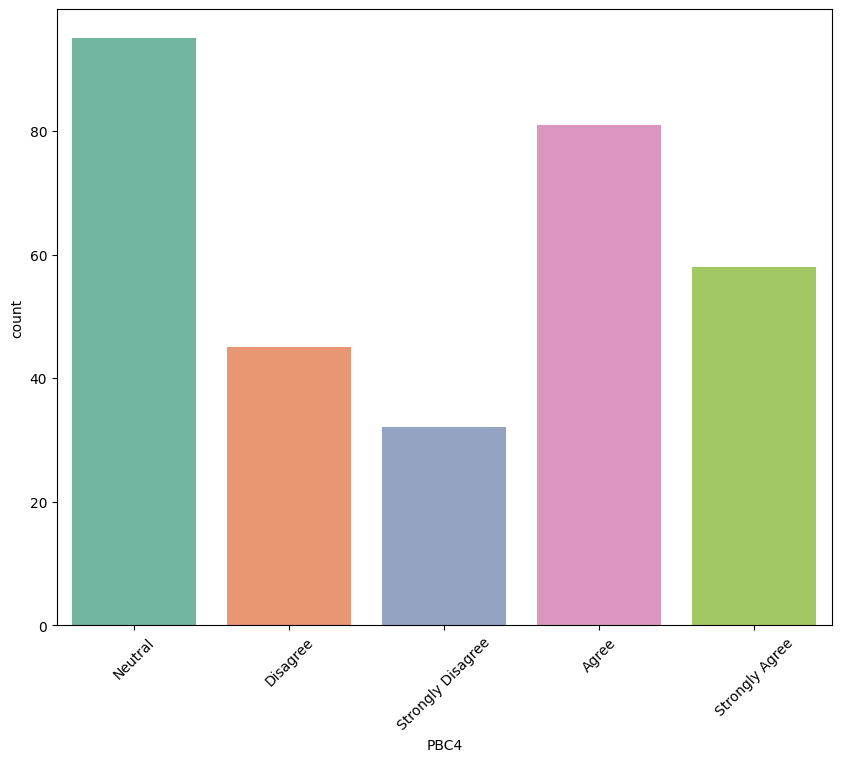

In [ ]:
features = [ 'PBC1','PBC2','PBC3','PBC4']

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

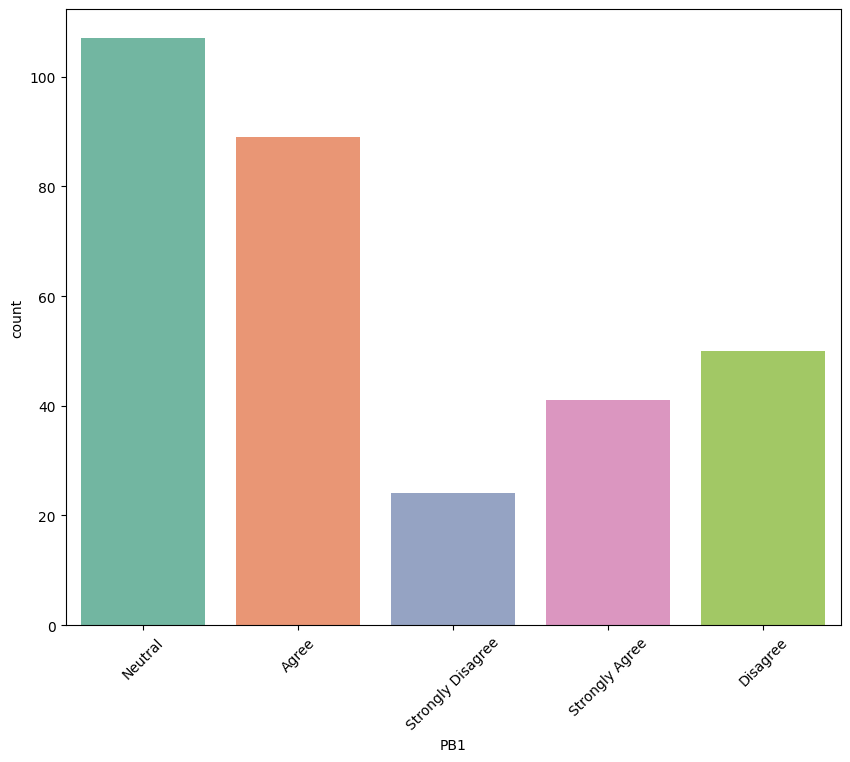

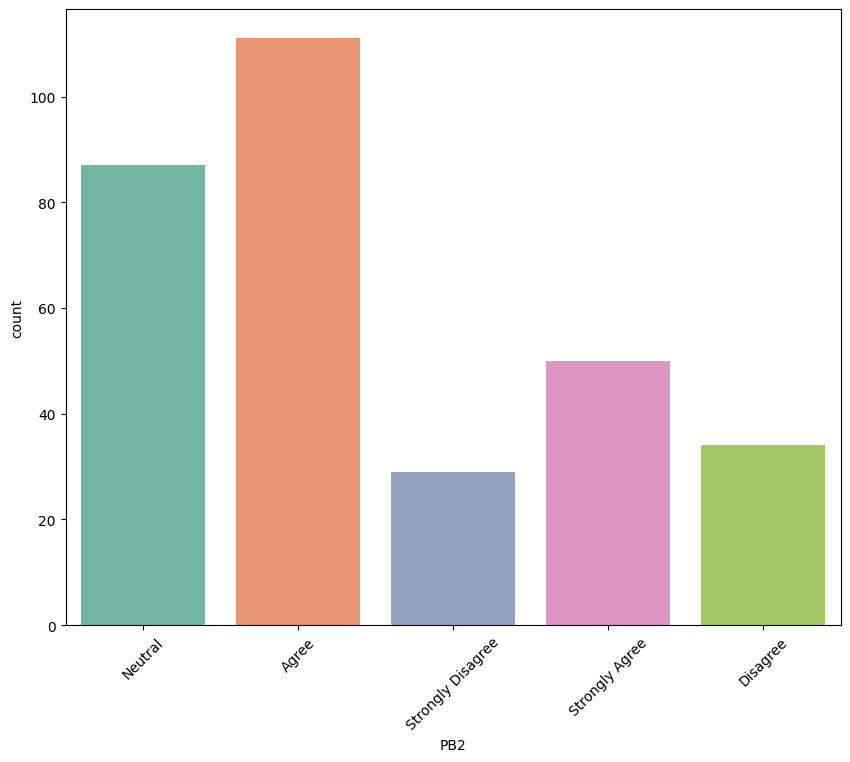

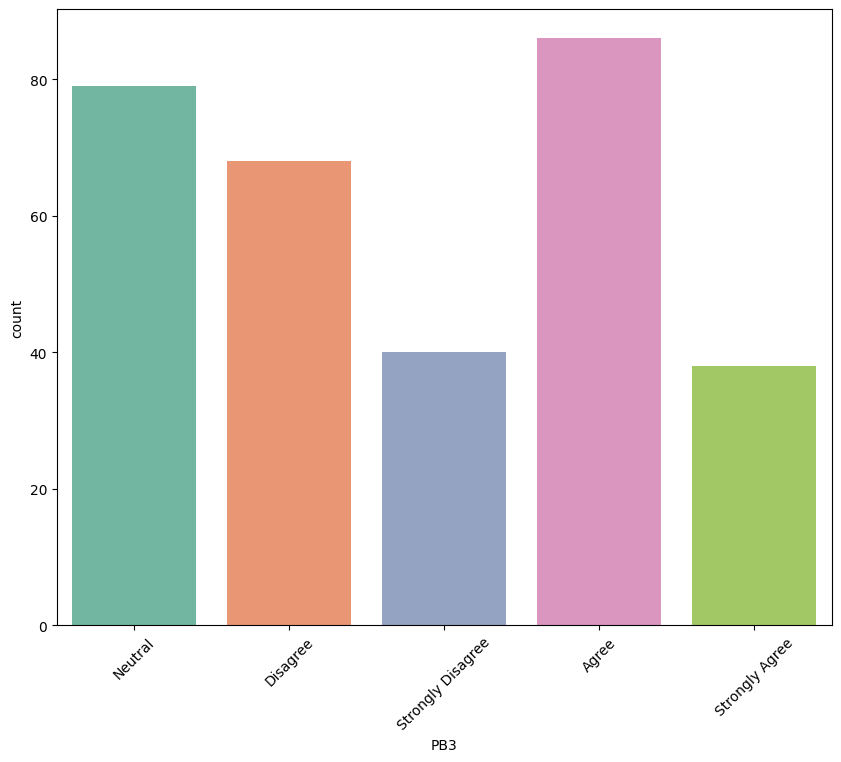

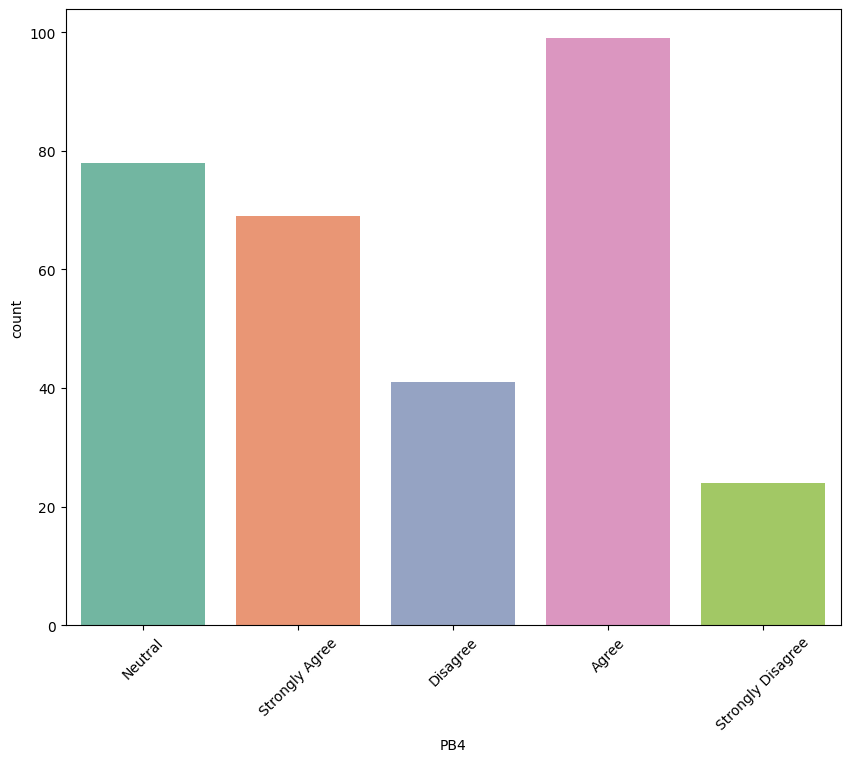

In [ ]:
#count plot of Purchase Behavior (PB)
features = [ 'PB1','PB2','PB3','PB4']

for f in features:
    sns.countplot(x = f, data = df1, palette = 'Set2')
    plt.xticks(rotation=45)
    plt.show()

Attitude Response

<Figure size 1900x1000 with 0 Axes>

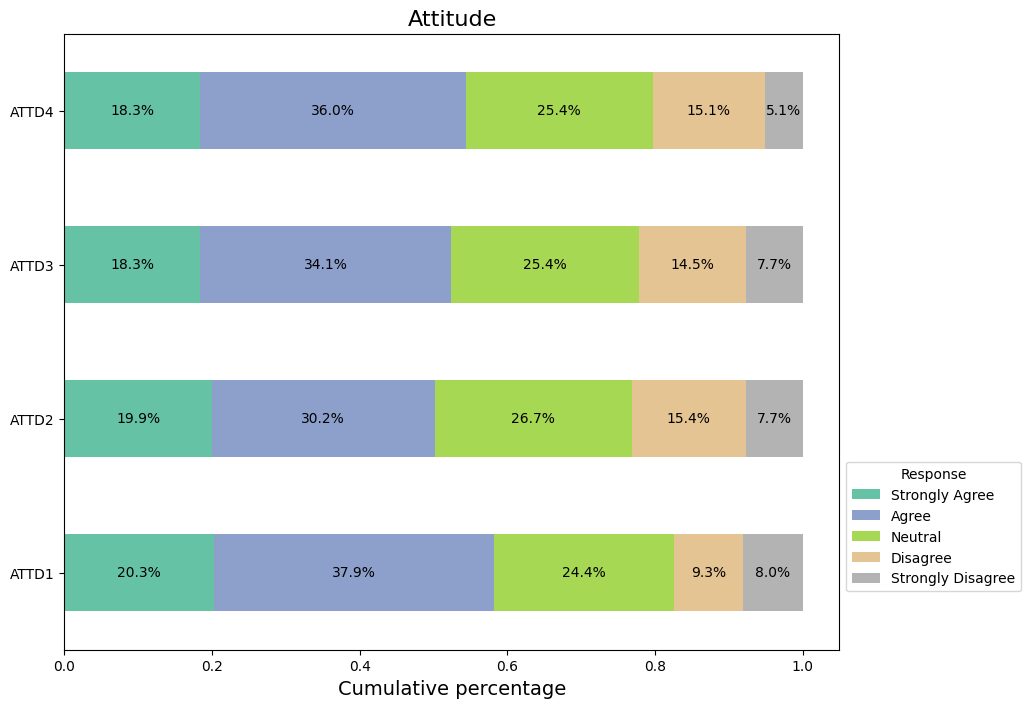

In [ ]:
features = ['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4']
response_categories = ['Strongly Agree','Agree','Neutral','Disagree', 'Strongly Disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df1[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['ATTD1',
                   'ATTD2',
                   'ATTD3',
                   'ATTD4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10))

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2')

plt.xlabel('Cumulative percentage', fontsize=14)
# plt.ylabel("Attitude related questions",fontsize=14)
plt.title('Attitude', fontsize=16)
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2))

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

plt.show()

In [ ]:
counts_df.head()

ATTD1  Strongly Agree     Agree   Neutral  Disagree  Strongly Disagree
ATTD1        0.202572  0.379421  0.244373  0.093248           0.080386
ATTD2        0.199357  0.302251  0.266881  0.154341           0.077170
ATTD3        0.183280  0.340836  0.254019  0.144695           0.077170
ATTD4        0.183280  0.360129  0.254019  0.151125           0.051447

Social Norms Response

<Figure size 1900x1000 with 0 Axes>

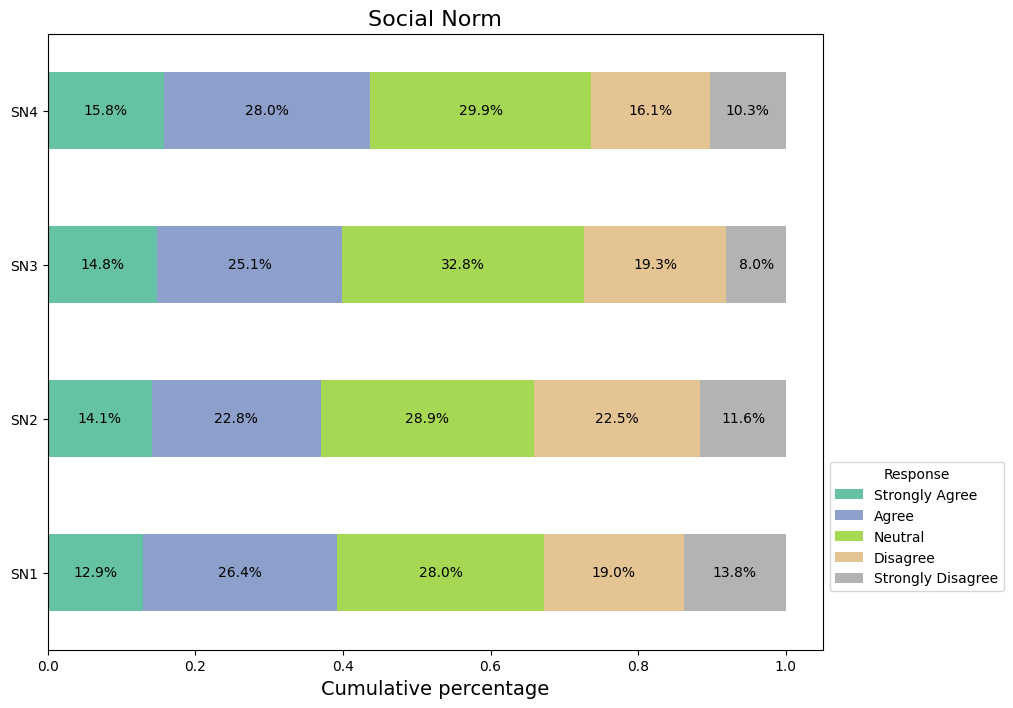

In [ ]:
features = ['SN1', 'SN2', 'SN3', 'SN4']
response_categories = ['Strongly Agree','Agree','Neutral','Disagree', 'Strongly Disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df1[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['SN1',
                   'SN2',
                   'SN3',
                   'SN4']
counts_df.head()

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Socail Norm related questions",fontsize=14)
plt.title('Social Norm', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being cut-off
plt.show()

In [ ]:
counts_df.head()

SN1  Strongly Agree     Agree   Neutral  Disagree  Strongly Disagree
SN1        0.128617  0.263666  0.279743  0.189711           0.138264
SN2        0.141479  0.228296  0.289389  0.225080           0.115756
SN3        0.147910  0.250804  0.327974  0.192926           0.080386
SN4        0.157556  0.279743  0.299035  0.160772           0.102894

Perceived Behavioral Control Response

<Figure size 1900x1000 with 0 Axes>

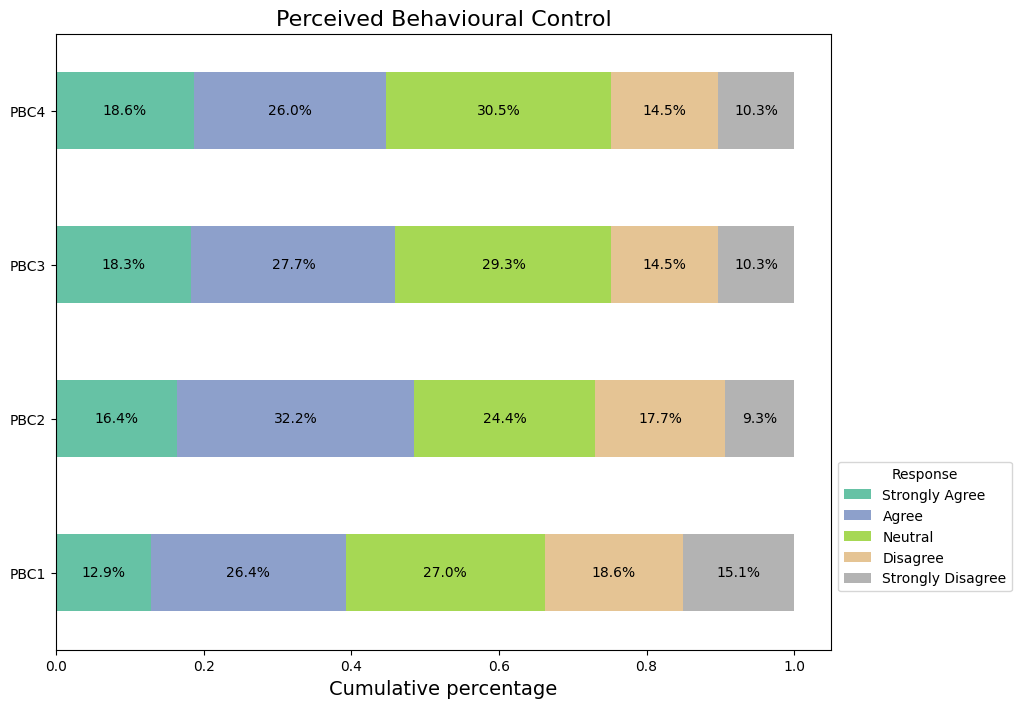

In [ ]:
features = ['PBC1', 'PBC2', 'PBC3', 'PBC4']

response_categories = ['Strongly Agree','Agree','Neutral','Disagree', 'Strongly Disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df1[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series
# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['PBC1',
                   'PBC2',
                   'PBC3',
                   'PBC4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Perceived Behavioral Control related questions",fontsize=14)
plt.title('Perceived Behavioural Control', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being ct-off
plt.show()

In [ ]:
counts_df.head()

PBC1  Strongly Agree     Agree   Neutral  Disagree  Strongly Disagree
PBC1        0.128617  0.263666  0.270096  0.186495           0.151125
PBC2        0.163987  0.321543  0.244373  0.176849           0.093248
PBC3        0.183280  0.276527  0.292605  0.144695           0.102894
PBC4        0.186495  0.260450  0.305466  0.144695           0.102894

Purchase Behavior(PB) response

<Figure size 1900x1000 with 0 Axes>

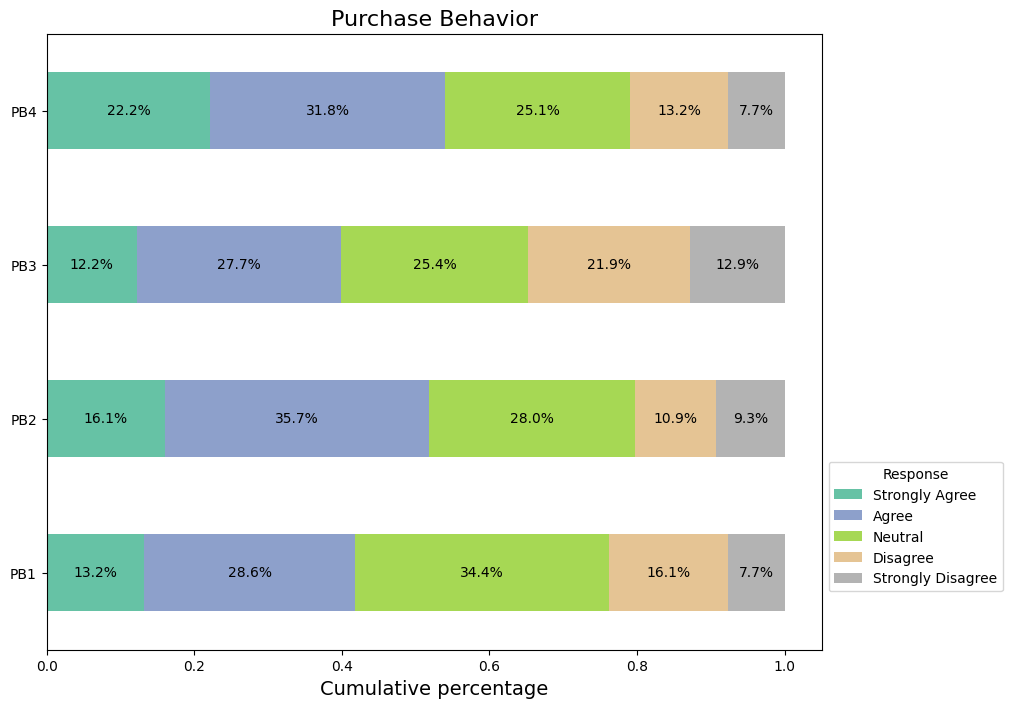

In [ ]:
features = ['PB1', 'PB2', 'PB3', 'PB4']

response_categories = ['Strongly Agree','Agree','Neutral','Disagree', 'Strongly Disagree',]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df1[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series
# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Rename the feature names
counts_df.index = ['PB1',
                   'PB2',
                   'PB3',
                   'PB4']

# Plot the stacked divided bar chart
plt.figure(figsize=(19,10)) # Increase the figure size for better visibility
# sns.set_style('whitegrid') # Set grid style for better visibility

ax = counts_df.plot(kind='barh', stacked=True, colormap='Set2') # Change kind to 'barh'

plt.xlabel('Cumulative percentage', fontsize=14) # Increase fontsize for better visibility
# plt.ylabel("Purchase Behavior related questions",fontsize=14)
plt.title('Purchase Behavior', fontsize=16) # Add title to the plot
plt.legend(title='Response', loc='center left', bbox_to_anchor=(1.0, .2)) # Move legend box outside of the plot

# Annotate the counts on the bars for better visualization
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.1%}'.format(width), # Change format to percentage
            horizontalalignment='center',
            verticalalignment='center')

# plt.tight_layout() # To make sure everything fits without being cut-off
plt.show()

In [ ]:
counts_df.head()

PB1  Strongly Agree     Agree   Neutral  Disagree  Strongly Disagree
PB1        0.131833  0.286174  0.344051  0.160772           0.077170
PB2        0.160772  0.356913  0.279743  0.109325           0.093248
PB3        0.122186  0.276527  0.254019  0.218650           0.128617
PB4        0.221865  0.318328  0.250804  0.131833           0.077170

DATA PREPROCESSING

# **Fuzzy Association Rule**

In [ ]:
# Define the mapping for categorical values to fuzzy values
fuzzy_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

In [ ]:
# Replace categorical values with fuzzy values for PB, ATTD, SN, PBC
columns_to_replace = ['PB1', 'PB2', 'PB3', 'PB4', 'ATTD1', 'ATTD2', 'ATTD3', 'ATTD4', 'SN1', 'SN2', 'SN3', 'SN4', 'PBC1', 'PBC2', 'PBC3', 'PBC4']
for column in columns_to_replace:
    df1[column] = df1[column].map(fuzzy_mapping)

# Merge PB1, PB2, PB3, PB4 to create a new column PB by summing the values
df1['PB'] = df1[['PB1', 'PB2', 'PB3', 'PB4']].sum(axis=1)

In [ ]:
# Define antecedents and consequent for fuzzy logic
PB = ctrl.Antecedent(np.arange(4, 21, 1), 'PB')
ATTD = ctrl.Antecedent(np.arange(1, 6, 1), 'ATTD')
SN = ctrl.Antecedent(np.arange(1, 6, 1), 'SN')
PBC = ctrl.Antecedent(np.arange(1, 6, 1), 'PBC')
Purchase = ctrl.Consequent(np.arange(1, 6, 1), 'Purchase')

# Define membership functions for PB
PB['Strongly_disagree'] = fuzz.trimf(PB.universe, [4, 4, 8])
PB['Disagree'] = fuzz.trimf(PB.universe, [4, 8, 12])
PB['Neutral'] = fuzz.trimf(PB.universe, [8, 12, 16])
PB['Agree'] = fuzz.trimf(PB.universe, [12, 16, 20])
PB['Strongly_agree'] = fuzz.trimf(PB.universe, [16, 20, 20])

In [ ]:
# Define membership functions for ATTD, SN, PBC
for antecedent in [ATTD, SN, PBC]:
    antecedent['Strongly_disagree'] = fuzz.trimf(antecedent.universe, [1, 1, 2])
    antecedent['Disagree'] = fuzz.trimf(antecedent.universe, [1, 2, 3])
    antecedent['Neutral'] = fuzz.trimf(antecedent.universe, [2, 3, 4])
    antecedent['Agree'] = fuzz.trimf(antecedent.universe, [3, 4, 5])
    antecedent['Strongly_agree'] = fuzz.trimf(antecedent.universe, [4, 5, 5])

In [ ]:
# Define membership functions for Purchase
Purchase['Low'] = fuzz.trimf(Purchase.universe, [1, 1, 3])
Purchase['High'] = fuzz.trimf(Purchase.universe, [3, 5, 5])

# Define fuzzy rules
rule1 = ctrl.Rule(PB['Strongly_disagree'] | PB['Disagree'], Purchase['Low'])
rule2 = ctrl.Rule(PB['Neutral'], Purchase['Low'])
rule3 = ctrl.Rule(PB['Agree'] | PB['Strongly_agree'], Purchase['High'])

In [ ]:
# Create control system and simulation
purchase_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
purchase_simulation = ctrl.ControlSystemSimulation(purchase_ctrl)

In [ ]:
# Apply fuzzy logic to create the 'Purchase' column
df1['Purchase'] = np.nan
for i, row in df1.iterrows():
    purchase_simulation.input['PB'] = row['PB']
    purchase_simulation.compute()
    df1.at[i, 'Purchase'] = purchase_simulation.output['Purchase']

# Classify Purchase into 'High' and 'Low'
df1['Purchase'] = df1['Purchase'].apply(lambda x: 'High' if x >= 3 else 'Low')

In [ ]:
df1['Purchase'].value_counts()
df1.head()

Gender                Age   Ethnic   Occupation       Annual_Income  \
0  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social_Media_usage Experience Reviews_and_rating                   ATI ADSM  \
0                Yes        Yes                Yes    More than 40 hours  Yes   
1                Yes        Yes                Yes    More than 40 hours  Yes   
2                Yes        Yes                Yes   5 hours to 10 hours   No   
3                Yes        Yes                 No     1 hour to 4 hours  Yes   
4                Yes        Yes                Yes  10 hours to 20 hours   No   

   ...  SN1  SN2  SN3  SN4  PBC1  PBC2  PBC3  PBC4  PB  Purchase  
0  ...    3    3    3    3     3     3     3     3  12       Low  
1  ...    1    2    4    3     3     4     2     2  15      High  
2  ...    1    1    1    1     1     1     1     1   5       Low  
3  ...    3    3    4    4     3     4     3     4  15      High  
4  ...    3    2    3    3     3     4     4     4  16      High  

[5 rows x 28 columns]

In [ ]:
dummy_df0=pd.DataFrame(df1)
dummy_df0.head()

Gender                Age   Ethnic   Occupation       Annual_Income  \
0  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social_Media_usage Experience Reviews_and_rating                   ATI ADSM  \
0                Yes        Yes                Yes    More than 40 hours  Yes   
1                Yes        Yes                Yes    More than 40 hours  Yes   
2                Yes        Yes                Yes   5 hours to 10 hours   No   
3                Yes        Yes                 No     1 hour to 4 hours  Yes   
4                Yes        Yes                Yes  10 hours to 20 hours   No   

   ...  SN1  SN2  SN3  SN4  PBC1  PBC2  PBC3  PBC4  PB  Purchase  
0  ...    3    3    3    3     3     3     3     3  12       Low  
1  ...    1    2    4    3     3     4     2     2  15      High  
2  ...    1    1    1    1     1     1     1     1   5       Low  
3  ...    3    3    4    4     3     4     3     4  15      High  
4  ...    3    2    3    3     3     4     4     4  16      High  

[5 rows x 28 columns]

<Axes: title={'center': ' PB target attribute to two class High and Low'}, xlabel='PB-inf', ylabel='Counts'>

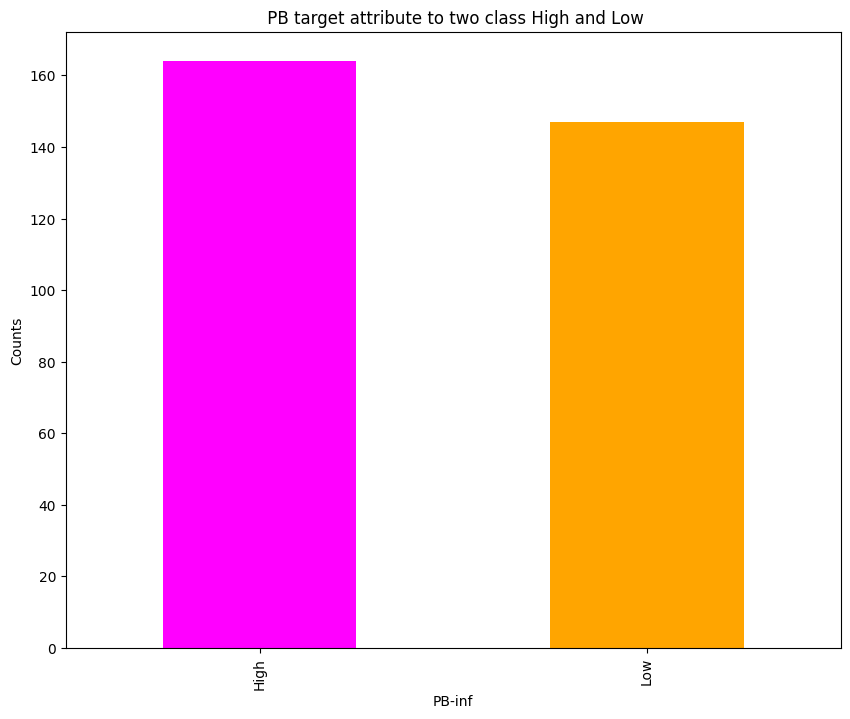

In [ ]:
df1['Purchase'].value_counts().plot(kind='bar', color = ['Magenta','Orange'], title = " PB target attribute to two class High and Low", ylabel = "Counts",  xlabel='PB-inf')

In [ ]:
df1['Purchase'].value_counts()

Purchase
High    164
Low     147
Name: count, dtype: int64

<Axes: xlabel='PB', ylabel='Age'>

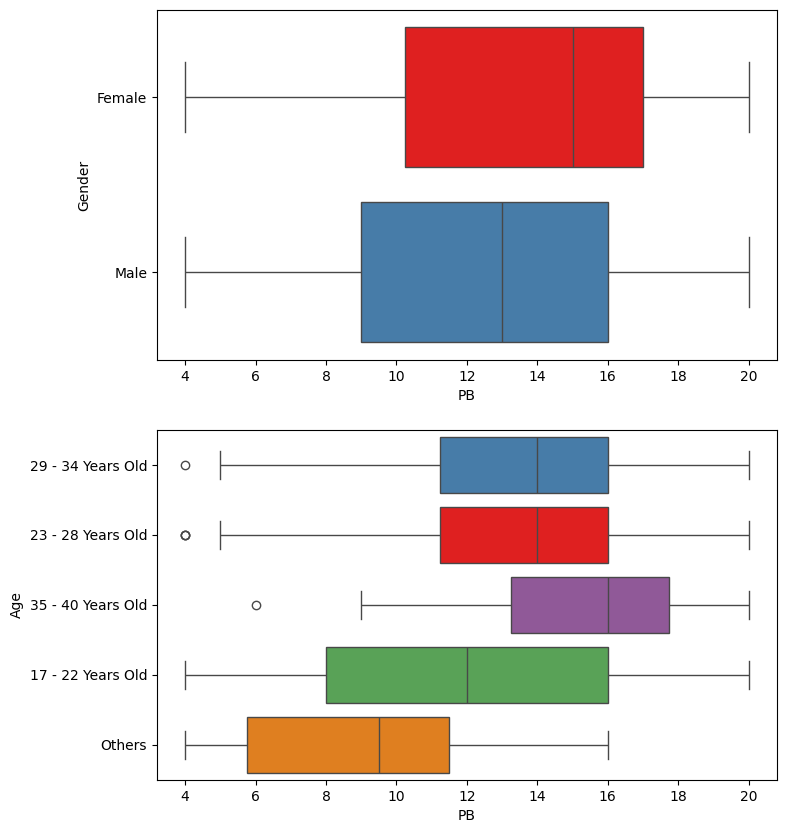

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

#create boxplot in each subplot
sns.boxplot(data=df1, x='PB', y='Gender', ax=axes[0],palette={"Female": "r", "Male" : "#377eb8"})
sns.boxplot(data=df1, x='PB', y='Age', ax=axes[1],palette={'29 - 34 Years Old':"#377eb8", '23 - 28 Years Old':"r", '35 - 40 Years Old':"#984ea3", '17 - 22 Years Old':"#4daf4a", 'Others':"#ff7f00"})

<Axes: xlabel='PB', ylabel='ADSM'>

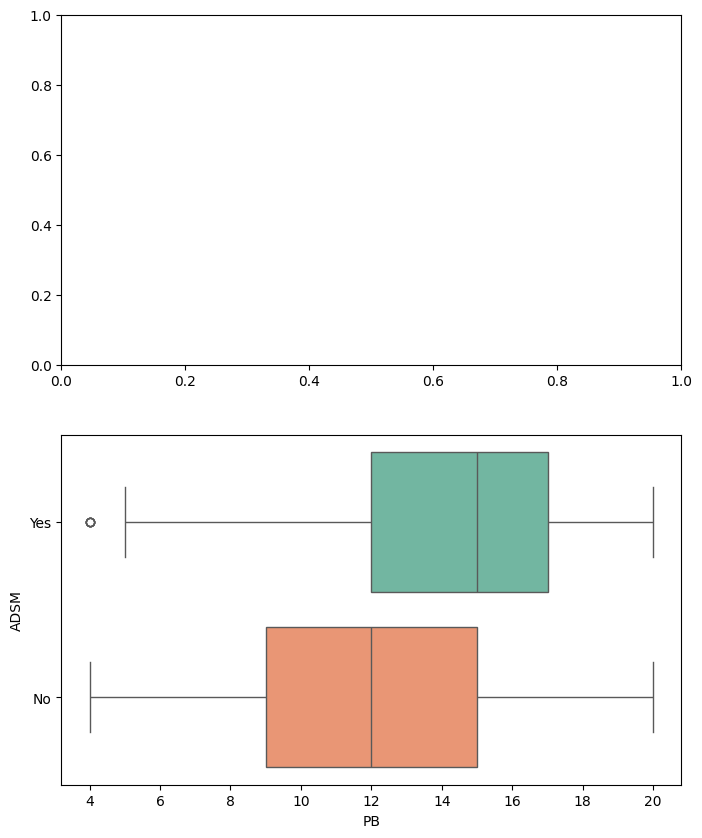

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
sns.boxplot(data=df1, x='PB', y='ADSM', ax=axes[1],palette={"Yes": "#66c2a5", "No" : "#fc8d62"})

<Axes: xlabel='PB', ylabel='Ethnic'>

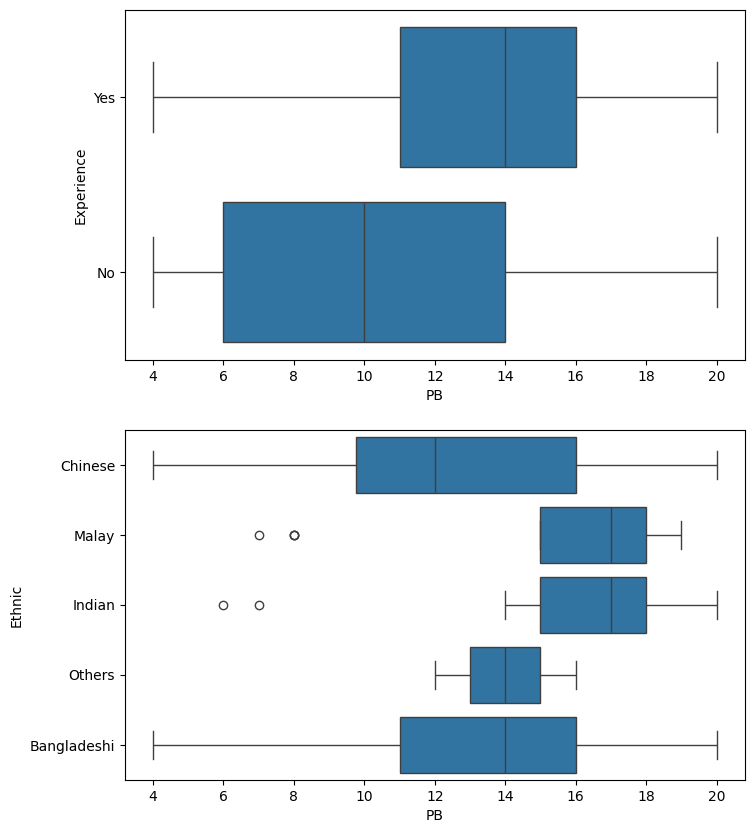

In [ ]:
#define plotting region (2 rows, 1 columns)
fig, axes = plt.subplots(2, 1, figsize=(8 ,10))

#create boxplot in each subplot
sns.boxplot(data=df1, x='PB', y='Experience', ax=axes[0])
sns.boxplot(data=df1, x='PB', y='Ethnic', ax=axes[1])

<Axes: xlabel='PB', ylabel='Reviews_and_rating'>

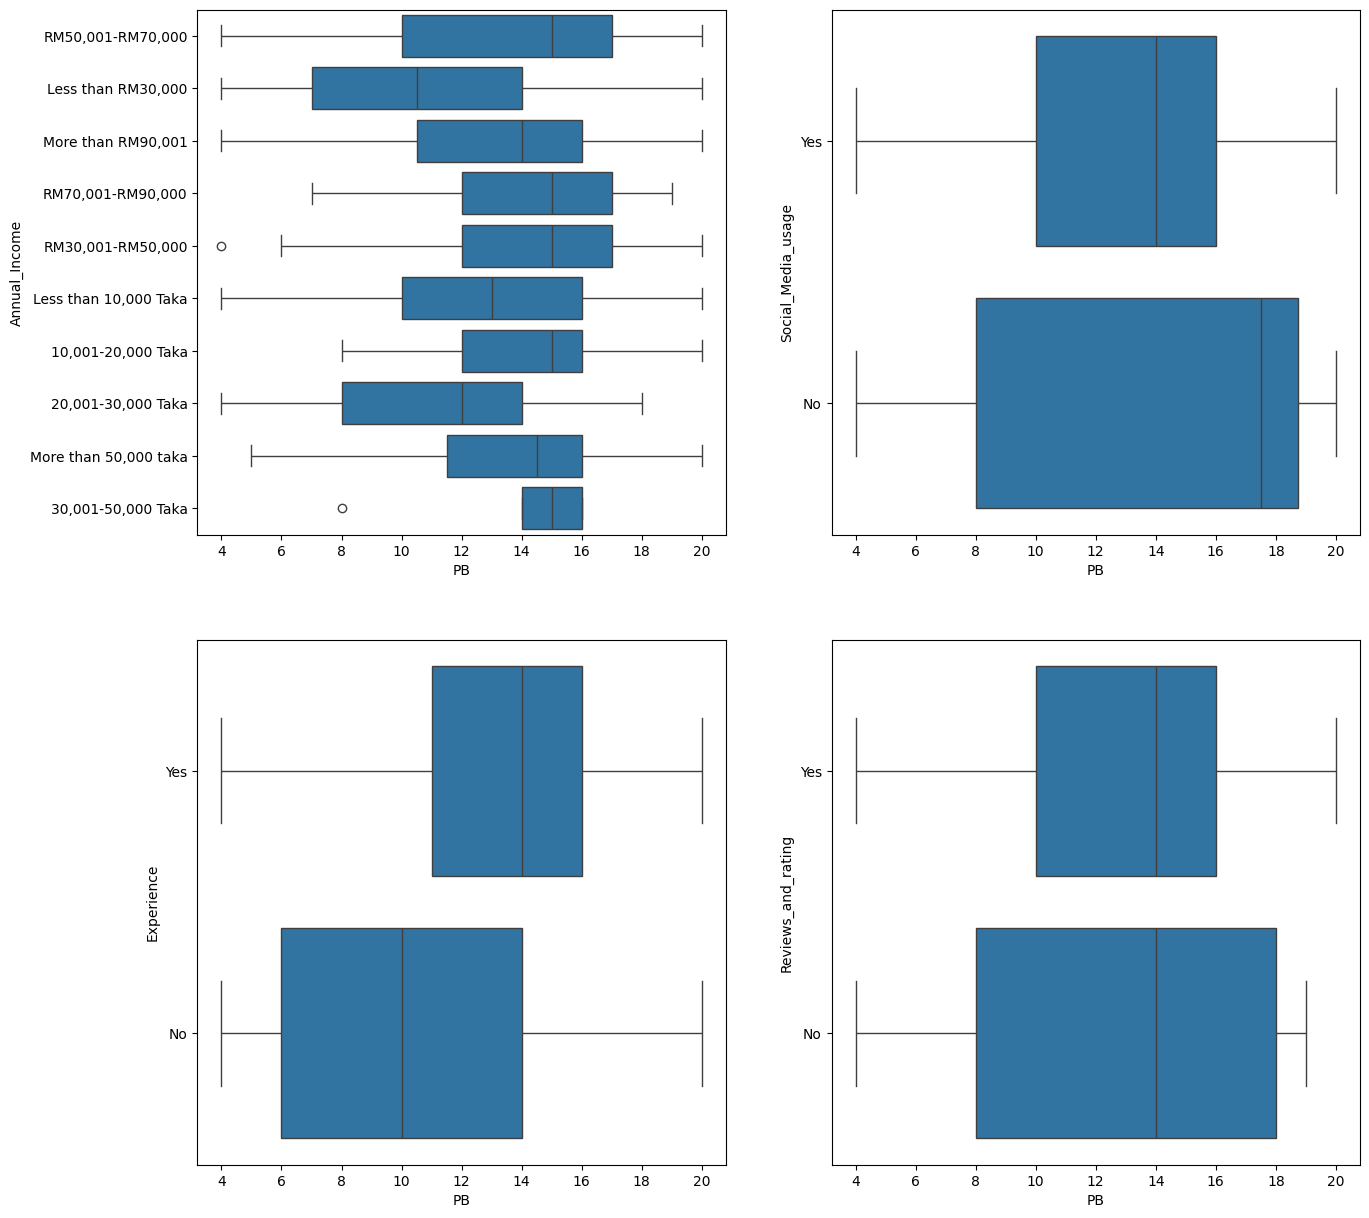

In [ ]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#create boxplot in each subplot
sns.boxplot(data=df1, x='PB', y='Annual_Income', ax=axes[0,0])
sns.boxplot(data=df1, x='PB', y='Social_Media_usage', ax=axes[0,1])
sns.boxplot(data=df1, x='PB', y='Experience', ax=axes[1,0])
sns.boxplot(data=df1, x='PB', y='Reviews_and_rating', ax=axes[1,1])

# **Optimization**

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df3= df1.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df1.shape)
df1.head()

(311, 23)


Gender                Age   Ethnic   Occupation       Annual_Income  \
0  Female  29 - 34 Years Old  Chinese    Homemaker   RM50,001-RM70,000   
1    Male  23 - 28 Years Old  Chinese      Student   RM50,001-RM70,000   
2  Female  29 - 34 Years Old  Chinese    Homemaker  Less than RM30,000   
3    Male  35 - 40 Years Old    Malay  Businessman  More than RM90,001   
4  Female  23 - 28 Years Old  Chinese     Employee   RM70,001-RM90,000   

  Social_Media_usage Experience Reviews_and_rating                   ATI ADSM  \
0                Yes        Yes                Yes    More than 40 hours  Yes   
1                Yes        Yes                Yes    More than 40 hours  Yes   
2                Yes        Yes                Yes   5 hours to 10 hours   No   
3                Yes        Yes                 No     1 hour to 4 hours  Yes   
4                Yes        Yes                Yes  10 hours to 20 hours   No   

   ...  ATTD4  SN1  SN2  SN3  SN4  PBC1  PBC2  PBC3  PBC4  Purchase  
0  ...      3    3    3    3    3     3     3     3     3       Low  
1  ...      3    1    2    4    3     3     4     2     2      High  
2  ...      2    1    1    1    1     1     1     1     1       Low  
3  ...      3    3    3    4    4     3     4     3     4      High  
4  ...      4    3    2    3    3     3     4     4     4      High  

[5 rows x 23 columns]

In [ ]:
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM']
df1.drop(columns = colsToDrop, inplace = True)
y = df1['Purchase']
X = df1.drop(columns = 'Purchase')

In [ ]:
df1.head()

ATTD1  ATTD2  ATTD3  ATTD4  SN1  SN2  SN3  SN4  PBC1  PBC2  PBC3  PBC4  \
0      3      3      3      3    3    3    3    3     3     3     3     3   
1      4      3      4      3    1    2    4    3     3     4     2     2   
2      3      1      1      2    1    1    1    1     1     1     1     1   
3      4      4      4      3    3    3    4    4     3     4     3     4   
4      3      4      4      4    3    2    3    3     3     4     4     4   

  Purchase  
0      Low  
1     High  
2      Low  
3     High  
4     High

Correlation between PBC and other attributes:
ATTD1   -0.604673
ATTD2   -0.643898
ATTD3   -0.673785
ATTD4   -0.648259
SN1     -0.554302
SN2     -0.609142
SN3     -0.590690
SN4     -0.520016
PBC1    -0.631207
PBC2    -0.627128
PBC3    -0.640584
PBC4    -0.637868
Name: PB, dtype: float64


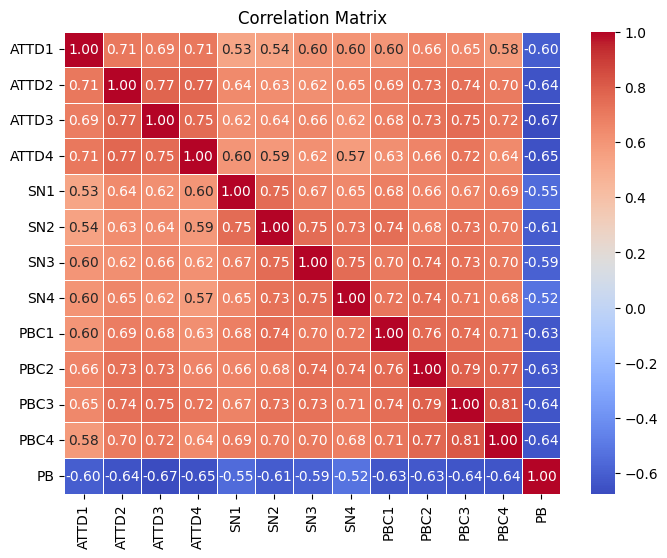

In [ ]:
corr_df = pd.DataFrame(df1)
# Encode categorical variable
label_encoder = LabelEncoder()
corr_df['PB'] = label_encoder.fit_transform(corr_df['Purchase'])

# Compute correlation matrix
correlation_matrix = corr_df[['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4', 'SN1', 'SN2', 'SN3', 'SN4','PBC1', 'PBC2', 'PBC3', 'PBC4', 'PB']].corr()

# Extract correlation between PBC and other attributes
correlation_with_PBC = correlation_matrix.loc['PB', ['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4', 'SN1', 'SN2', 'SN3', 'SN4','PBC1',	'PBC2',	'PBC3',	'PBC4']]

print("Correlation between PBC and other attributes:")
print(correlation_with_PBC)
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
corr_df.head()

ATTD1  ATTD2  ATTD3  ATTD4  SN1  SN2  SN3  SN4  PBC1  PBC2  PBC3  PBC4  \
0      3      3      3      3    3    3    3    3     3     3     3     3   
1      4      3      4      3    1    2    4    3     3     4     2     2   
2      3      1      1      2    1    1    1    1     1     1     1     1   
3      4      4      4      3    3    3    4    4     3     4     3     4   
4      3      4      4      4    3    2    3    3     3     4     4     4   

  Purchase  PB  
0      Low   1  
1     High   0  
2      Low   1  
3     High   0  
4     High   0

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

ZeroR Classifier

In [ ]:
# The Confusion matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):

    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, dummy_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.52      1.00      0.69        33
         Low       0.00      0.00      0.00        30

    accuracy                           0.52        63
   macro avg       0.26      0.50      0.34        63
weighted avg       0.27      0.52      0.36        63

Train Accuracy:  0.5282258064516129
Test Accuracy:  0.5238095238095238


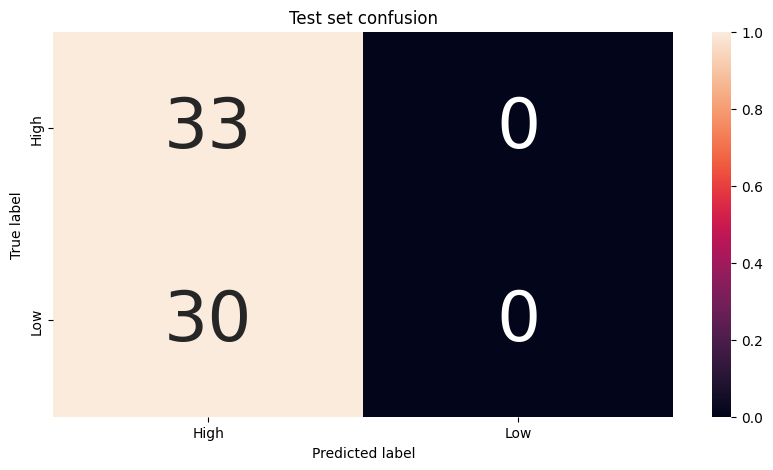

In [ ]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10,5))
plot_confusion_matrix(cm, classes=dummy_clf.classes_, title='Test set confusion')

# **Model**

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Initializing classifiers with default parameters
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'KNN': {'n_neighbors': np.arange(1, 11)},
    'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Logistic Regression': {'C': np.logspace(-4, 4, 9), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    'Naive Bayes': {},
    'SVM': {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
    'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': np.arange(1, 11)}
}

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
best_scores = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    best_scores[classifier_name] = grid_search.best_score_ * 100  # Convert to percentage
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

KNN: Best parameters - {'n_neighbors': 5}, Best score - 0.8591020408163266
Decision Tree: Best parameters - {'criterion': 'gini', 'max_depth': 3}, Best score - 0.8266938775510203
Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}, Best score - 0.871265306122449
Logistic Regression: Best parameters - {'C': 0.01, 'solver': 'sag'}, Best score - 0.8713469387755103
Naive Bayes: Best parameters - {}, Best score - 0.8713469387755103
SVM: Best parameters - {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}, Best score - 0.8711836734693877
AdaBoost: Best parameters - {'learning_rate': 0.1, 'n_estimators': 200}, Best score - 0.8631020408163265
Gradient Boosting: Best parameters - {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}, Best score - 0.8671836734693879


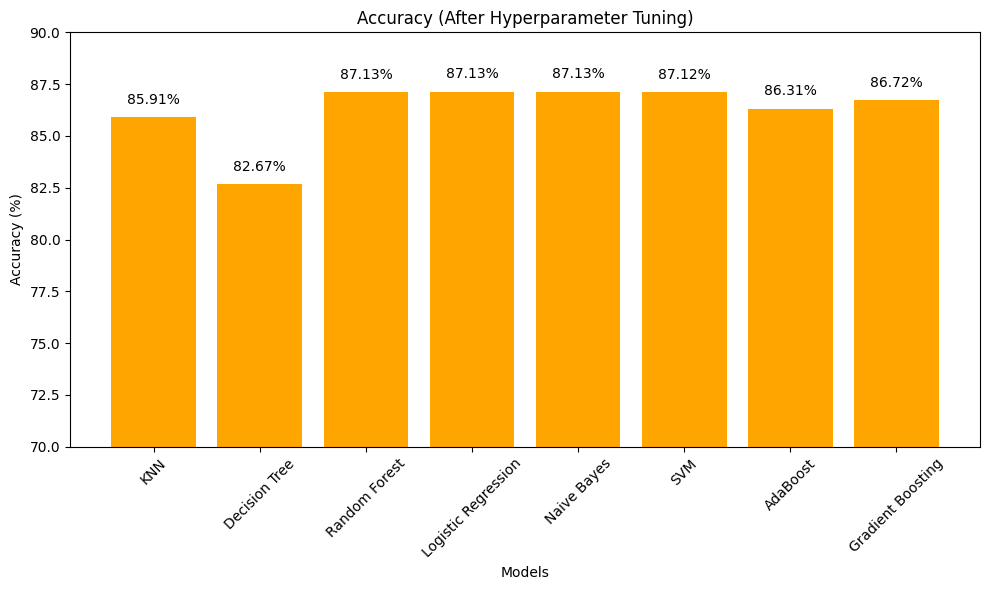

In [ ]:
# Plotting the bar chart for best scores
model_names = list(best_scores.keys())
scores = list(best_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, color='orange')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy (After Hyperparameter Tuning)')
plt.ylim(70, 90)
for index, score in enumerate(scores):
    plt.text(index, score + 0.5, f'{score:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **PB on ATTB, SN and PBC**

**KNN Classifer**

              precision    recall  f1-score   support

        High       0.88      0.91      0.90        33
         Low       0.90      0.87      0.88        30

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Train Accuracy:  0.8830645161290323
Test Accuracy:  0.8888888888888888


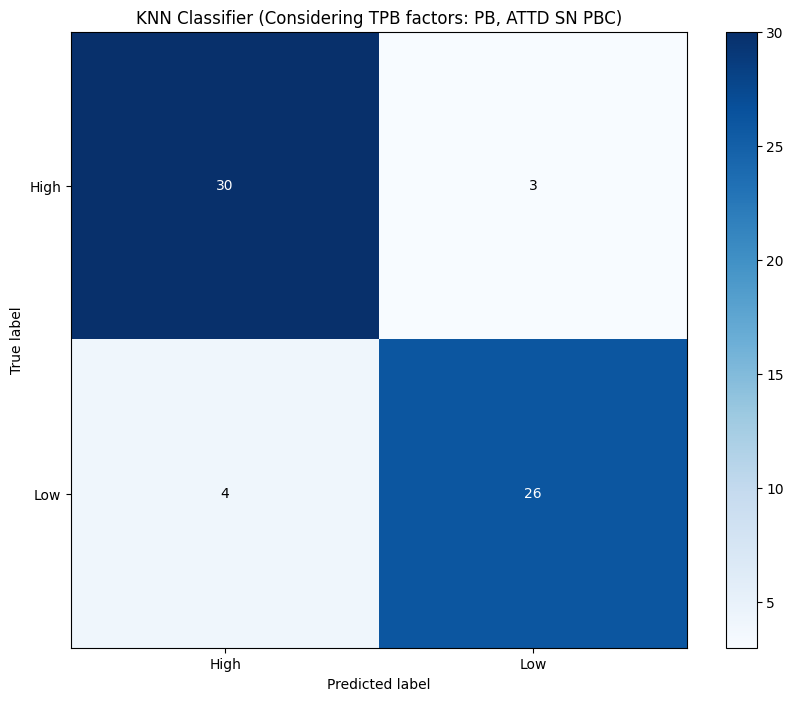

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN Classifier (Considering TPB factors: PB, ATTD SN PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

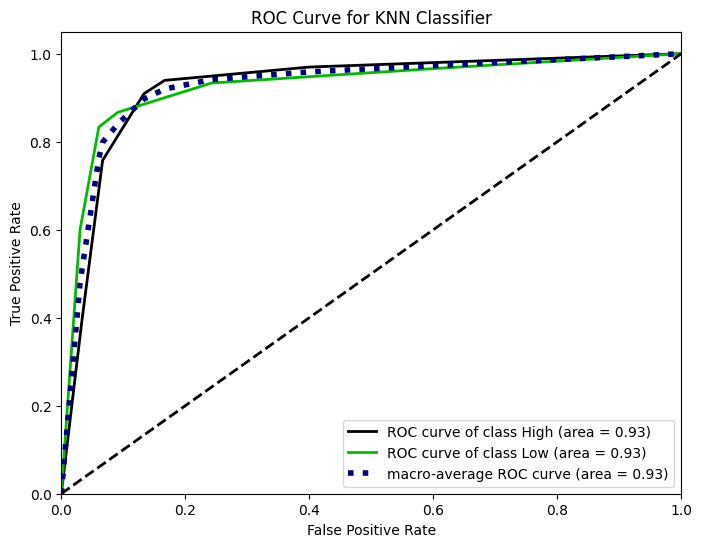

In [ ]:
y_probas = knn_clf.predict_proba(X_test)

# Plot ROC curve
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6), plot_micro=False, plot_macro=True, title="ROC Curve for KNN Classifier")

# Show the plot
plt.show()

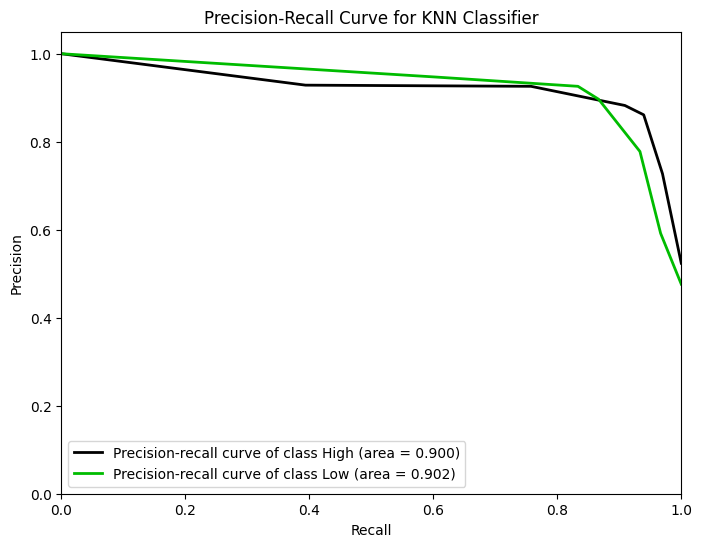

In [ ]:
#plotting PRC curve
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier");

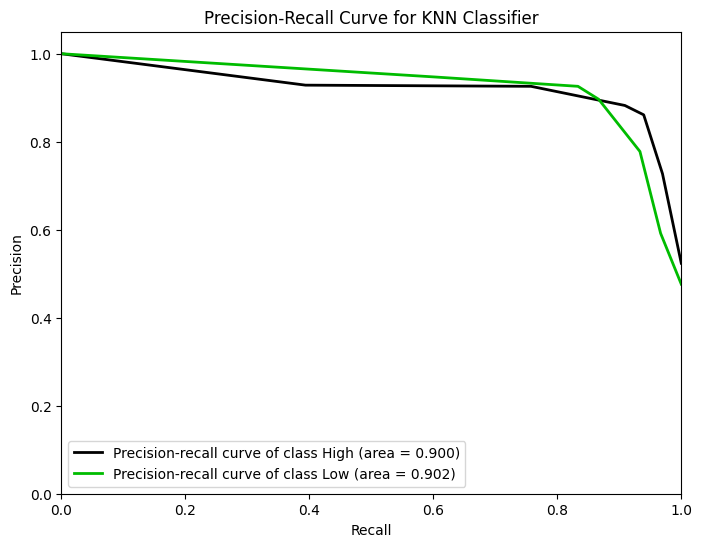

In [ ]:
#plotting PRC curve
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier");

**Decision Tree Classifier**

              precision    recall  f1-score   support

        High       0.78      0.88      0.83        33
         Low       0.85      0.73      0.79        30

    accuracy                           0.81        63
   macro avg       0.81      0.81      0.81        63
weighted avg       0.81      0.81      0.81        63

Train Accuracy:  0.8467741935483871
Test Accuracy:  0.8095238095238095


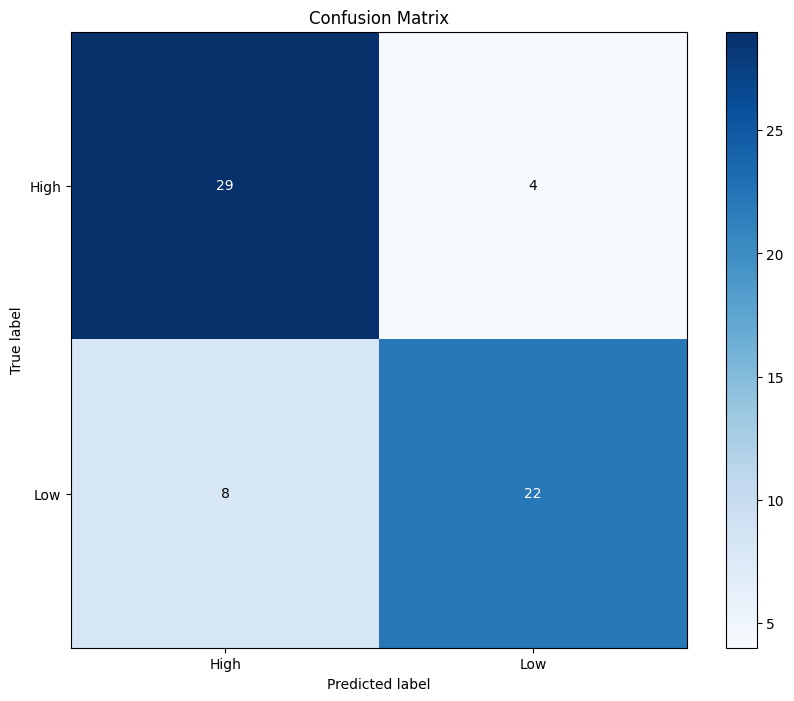

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

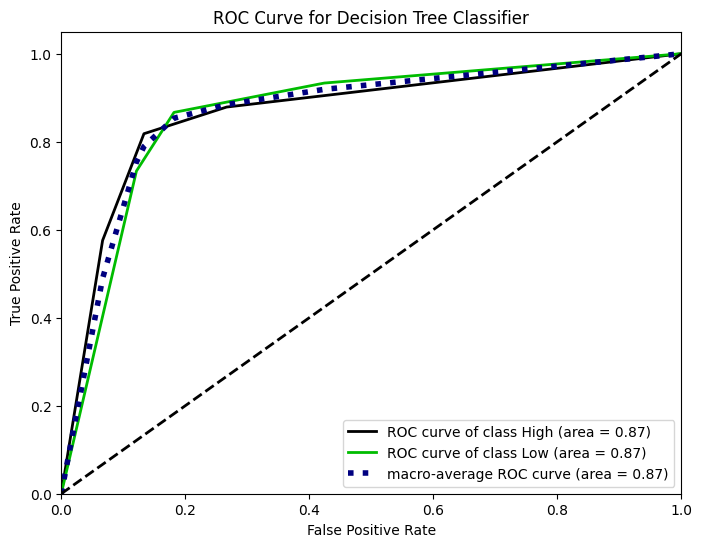

In [ ]:
#Plotting ROC curve for DT
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6), plot_micro=False, plot_macro=True, title="ROC Curve for Decision Tree Classifier")
plt.show()

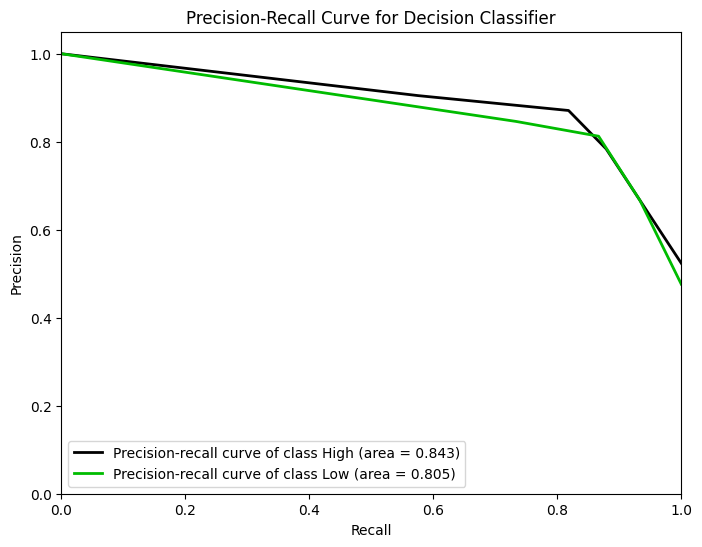

In [ ]:
#plotting PRC curve for DT
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

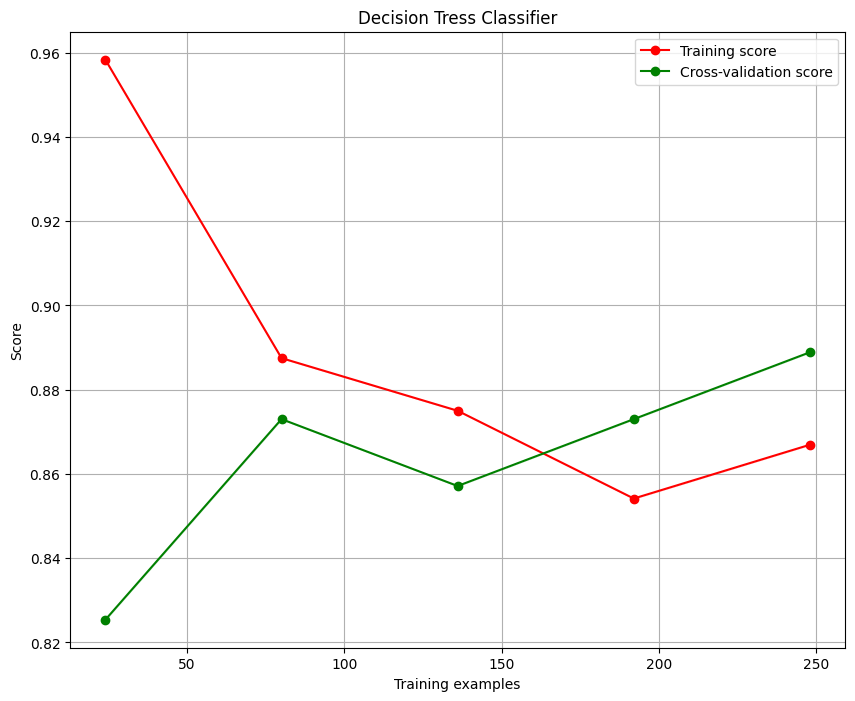

In [ ]:
#Plotting learning curve for DT
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

[Text(0.5, 0.8333333333333334, 'x[2] <= 3.5\ngini = 0.498\nsamples = 248\nvalue = [131, 117]'),
 Text(0.25, 0.5, 'x[1] <= 3.5\ngini = 0.285\nsamples = 116\nvalue = [20, 96]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.154\nsamples = 95\nvalue = [8, 87]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.75, 0.5, 'x[11] <= 3.5\ngini = 0.268\nsamples = 132\nvalue = [111, 21]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.484\nsamples = 34\nvalue = [20, 14]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.133\nsamples = 98\nvalue = [91, 7]')]

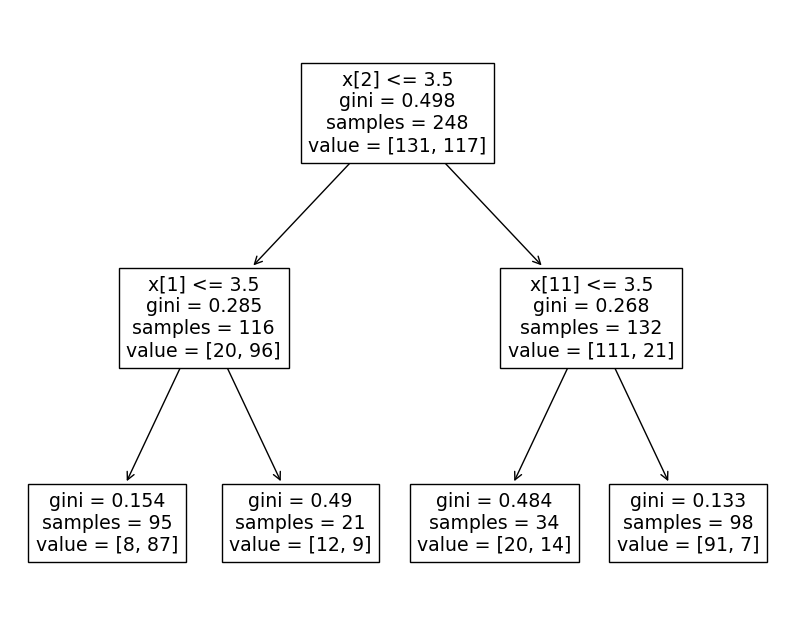

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

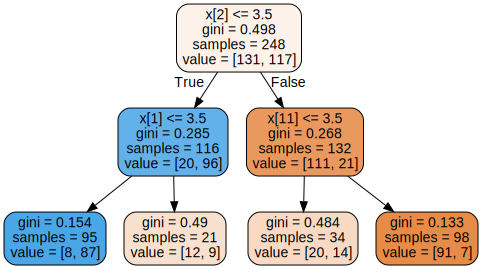

In [ ]:
#Visualization of DT using graphviz
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, filled = True, rounded = True, special_characters=False)
graph = graphviz.Source(dot_data)
graph

**Logistic Regression**

              precision    recall  f1-score   support

        High       0.96      0.82      0.89        33
         Low       0.83      0.97      0.89        30

    accuracy                           0.89        63
   macro avg       0.90      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Train Accuracy 0.8790322580645161
Test Accuracy 0.8888888888888888


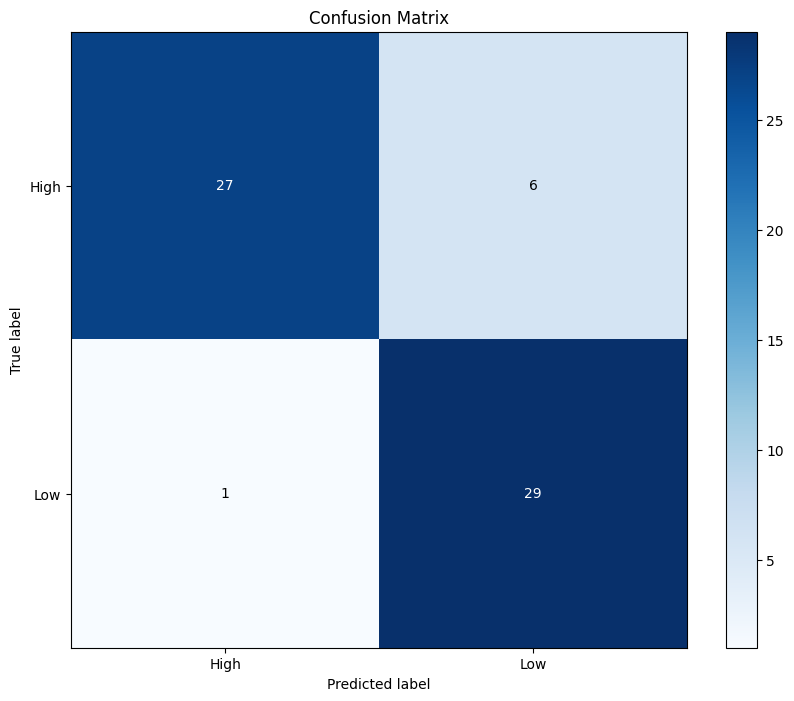

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

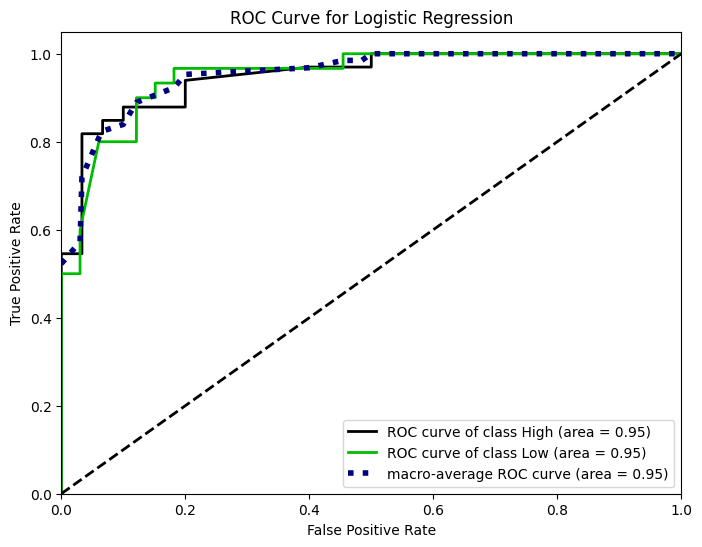

In [ ]:
#ploting ROC curve for logistic regression
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Logistic Regression");

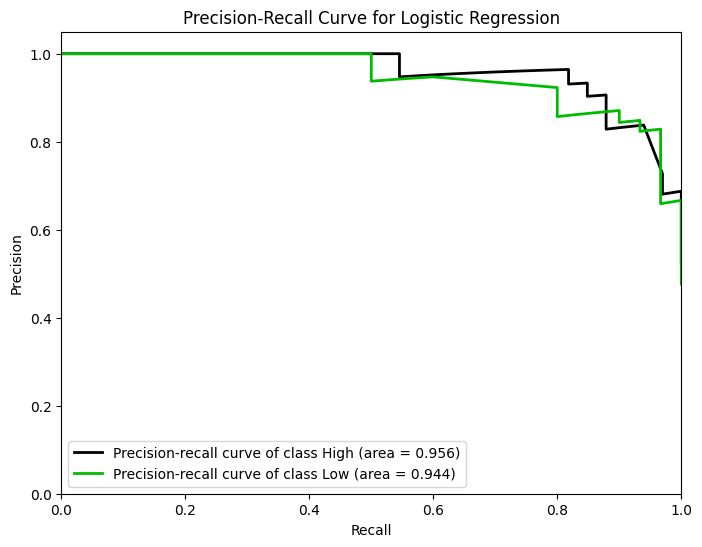

In [ ]:
#ploting PRC for logistic regression
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

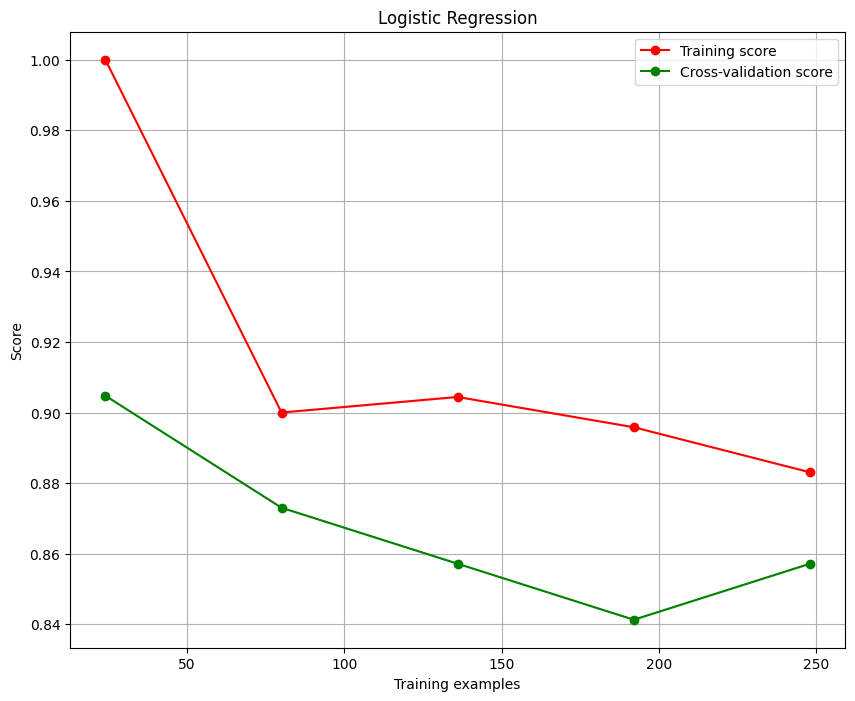

In [ ]:
#ploting learning curve for logistic regression
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

**Naive Bayes Classifier**

              precision    recall  f1-score   support

        High       0.93      0.85      0.89        33
         Low       0.85      0.93      0.89        30

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63

Train Accuracy 0.8669354838709677
Test Accuracy 0.8888888888888888


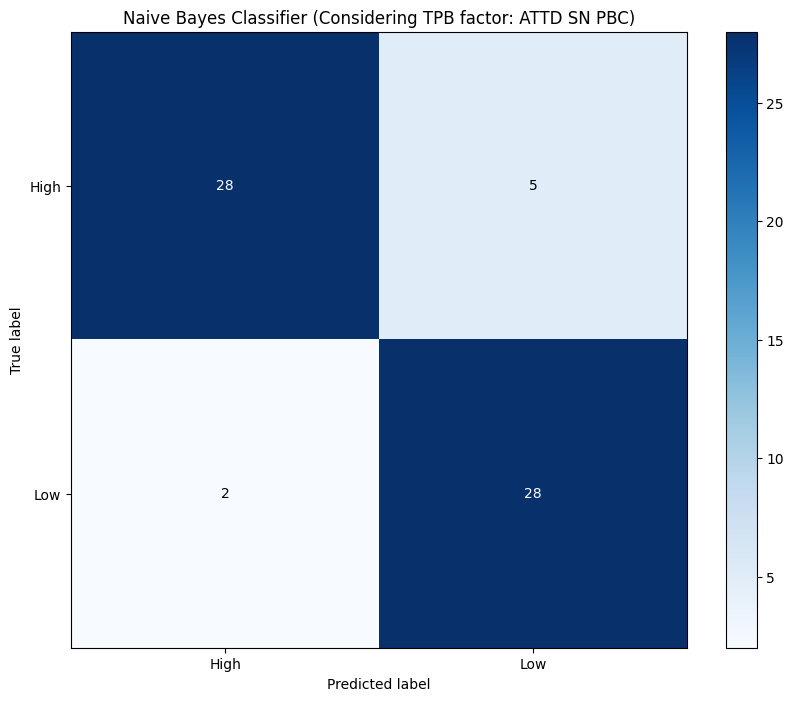

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Naive Bayes Classifier (Considering TPB factor: ATTD SN PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

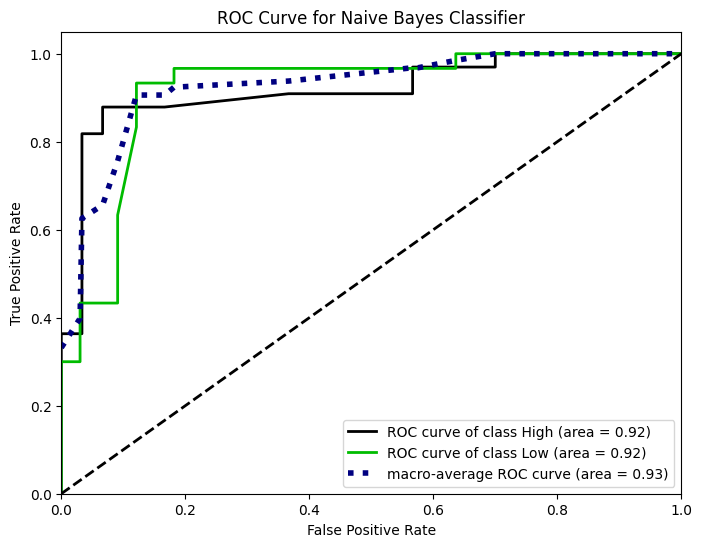

In [ ]:
#ploting ROC for Naive Bayes
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Naive Bayes Classifier");

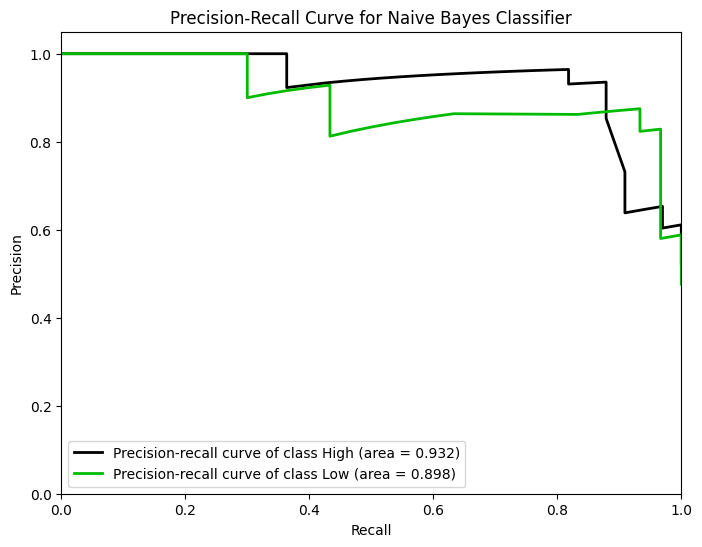

In [ ]:
#ploting PRC for Naive Bayes
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

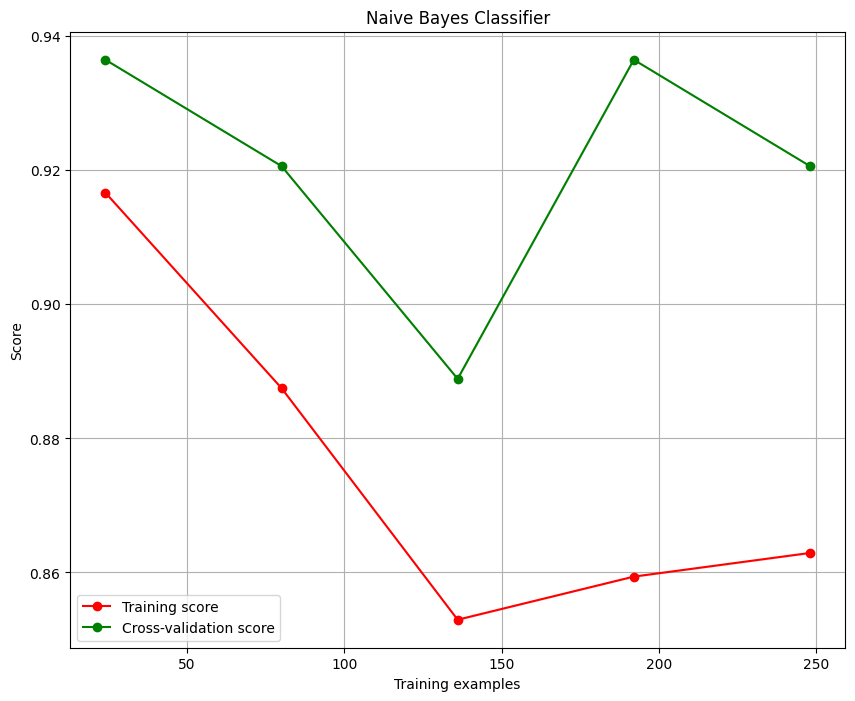

In [ ]:
#ploting learning curve for Naive Bayes
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

**Support Vector Machine (SVM) Classifier**

              precision    recall  f1-score   support

        High       0.93      0.82      0.87        33
         Low       0.82      0.93      0.87        30

    accuracy                           0.87        63
   macro avg       0.88      0.88      0.87        63
weighted avg       0.88      0.87      0.87        63

Train Accuracy 0.8830645161290323
Test Accuracy 0.873015873015873


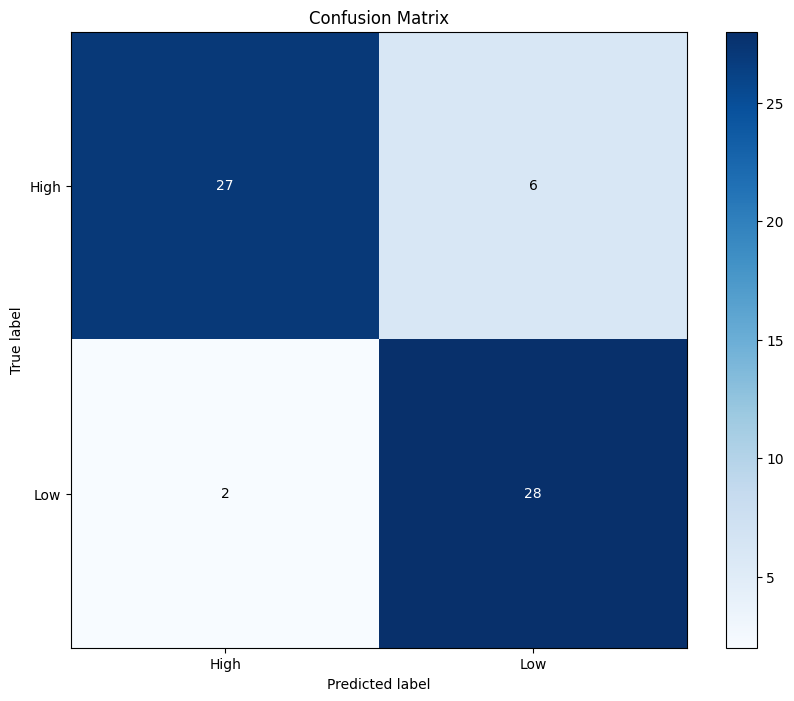

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

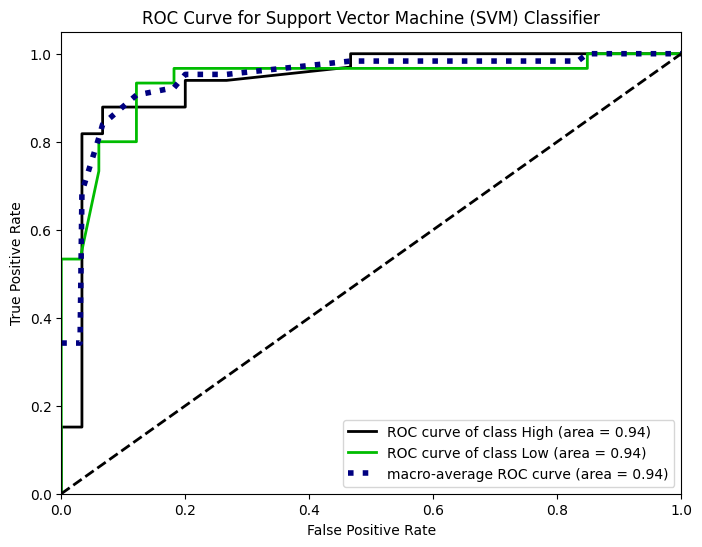

In [ ]:
#ploting ROC curve for SVM
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

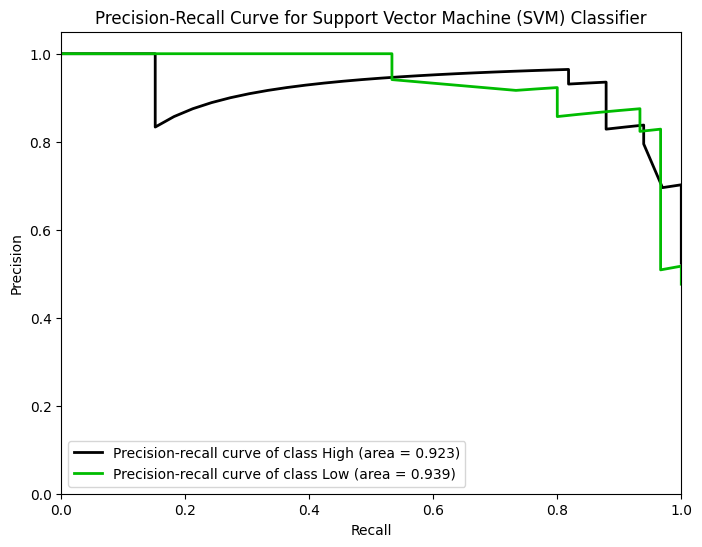

In [ ]:
#ploting PRC curve for SVM
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

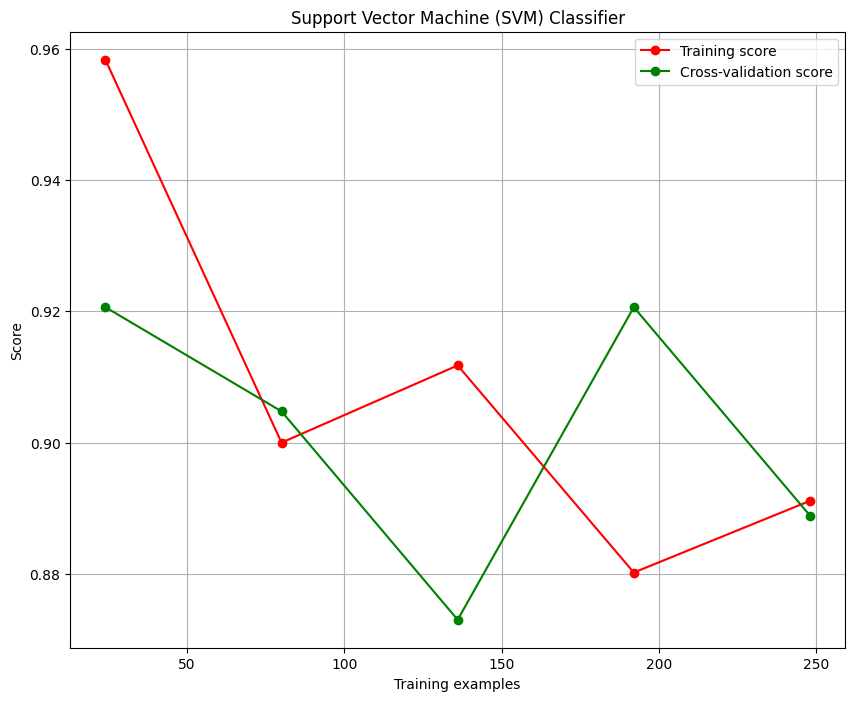

In [ ]:
#ploting learning for SVM
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

              precision    recall  f1-score   support

        High       0.88      0.88      0.88        33
         Low       0.87      0.87      0.87        30

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63

Train Accuracy 0.9475806451612904
Test Accuracy 0.873015873015873


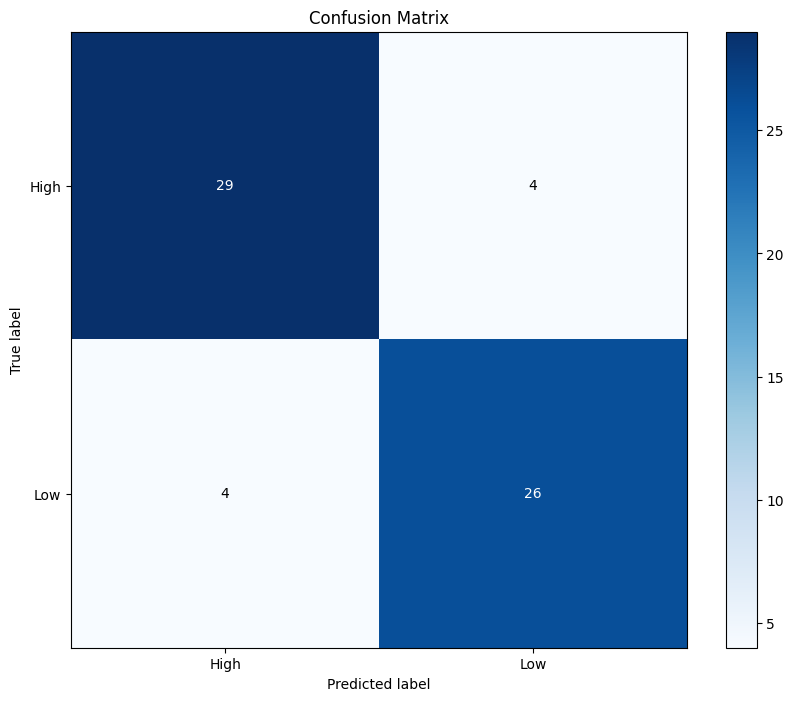

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(criterion='gini', max_depth= 6, n_estimators =100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#ploting confusion matrix for RF
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

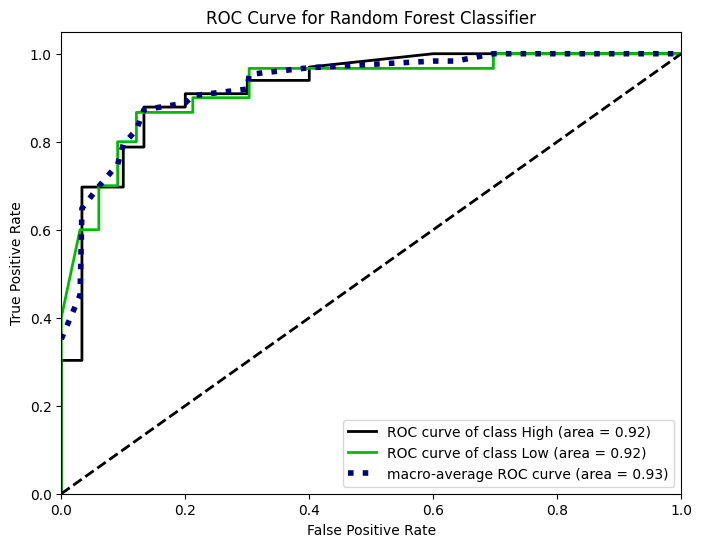

In [ ]:
#ploting ROC curve for RF
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for Random Forest Classifier");

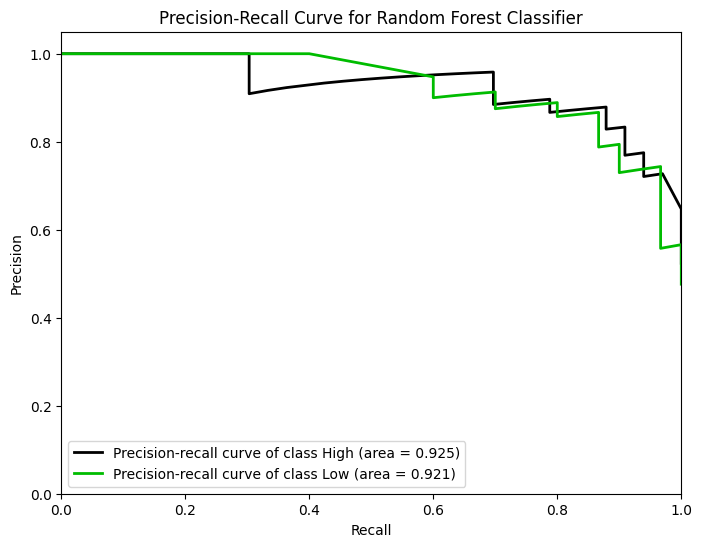

In [ ]:
#ploting PRC curve for RF
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

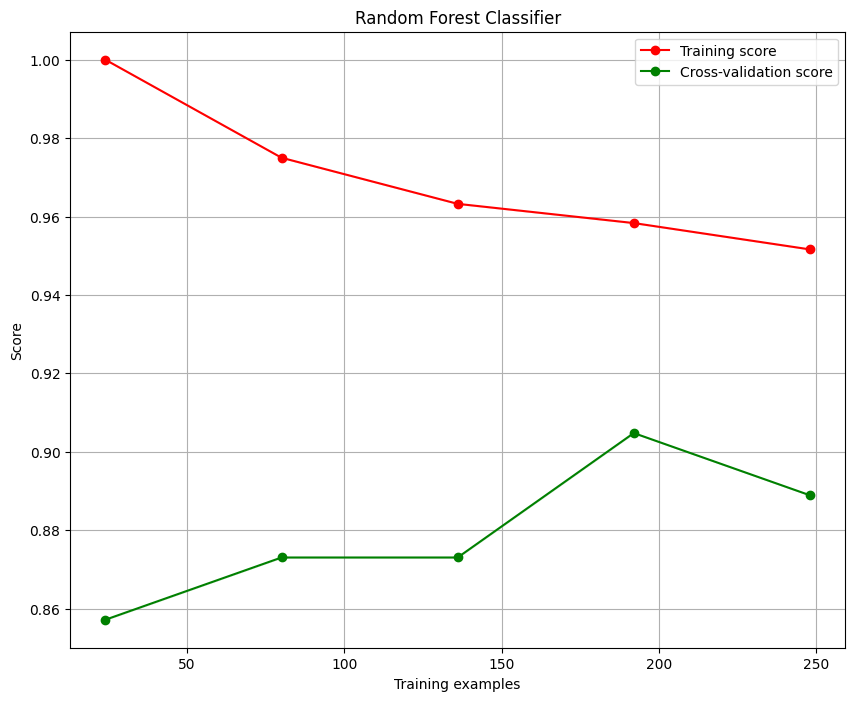

In [ ]:
#ploting Learning curve for RF
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

              precision    recall  f1-score   support

        High       0.91      0.91      0.91        33
         Low       0.90      0.90      0.90        30

    accuracy                           0.90        63
   macro avg       0.90      0.90      0.90        63
weighted avg       0.90      0.90      0.90        63

Train Accuracy 0.875
Test Accuracy 0.9047619047619048


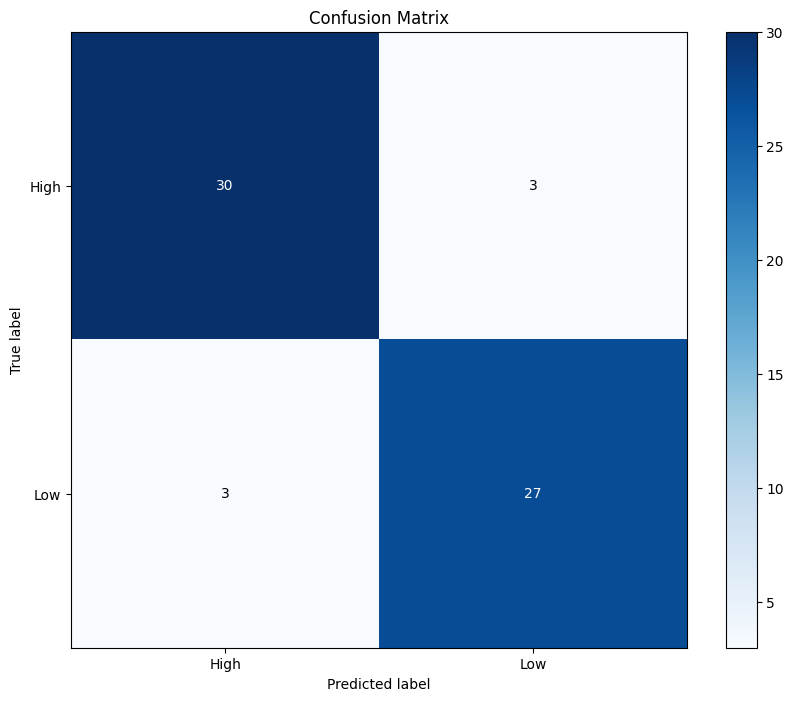

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=50)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

#ploting confusion matrix for AdaBoost
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

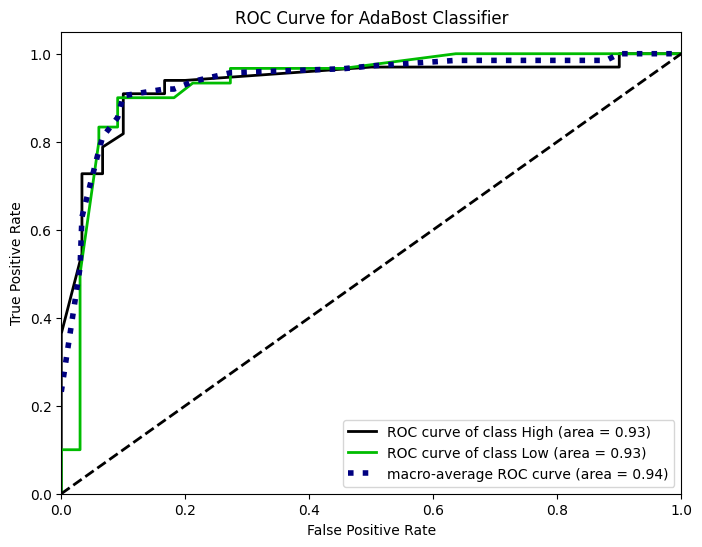

In [ ]:
#ploting ROC curve for AdaBoost
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = True,
                      title = "ROC Curve for AdaBost Classifier");

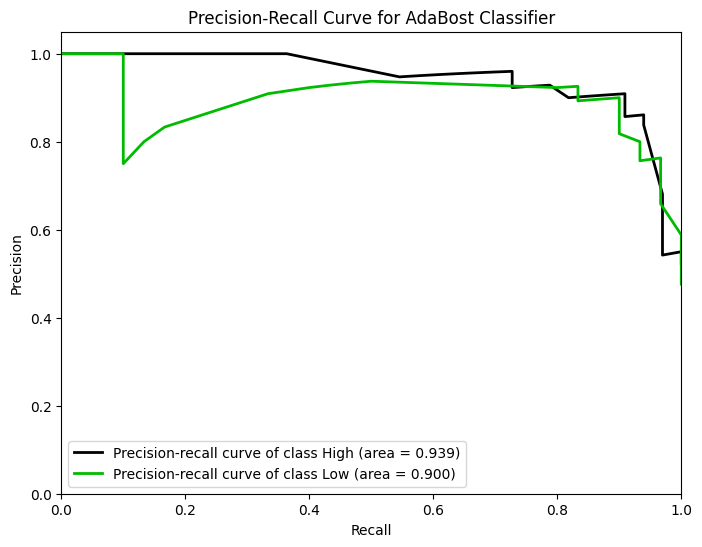

In [ ]:
#ploting PRC curve for Adaboost
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

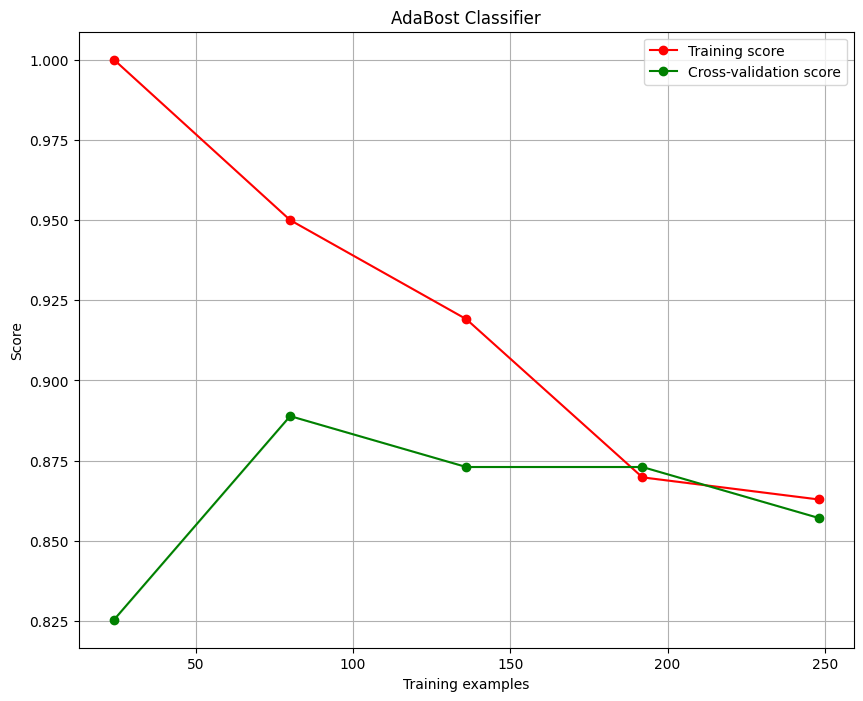

In [ ]:
#ploting learning curve for Adaboost
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# Create the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    mode="classification",
    feature_names=X_train.columns,
    categorical_features=[0],  # If you have categorical features, specify their indices
    class_names=["Low", "High"],  # Specify your class names
    verbose=True,
    random_state=42
)


# Choose a specific instance from the test set for explanation
explanation_instance = X_test.iloc[0]

# Get the explanation for the instance
explanation = explainer.explain_instance(
    explanation_instance,
    Ada_clf.predict_proba,
    num_features=len(X_train.columns)  # Number of features to show in explanation
)


Intercept 0.4017035484973553
Prediction_local [0.73235336]
Right: 0.6725813877129961


In [ ]:
# Print the explanation for the predicted class
explanation.show_in_notebook()

In [ ]:
explanation.as_list()

[('ATTD3 <= 3.00', 0.08326917482599151),
 ('PBC1 <= 2.00', 0.08300382353879061),
 ('ATTD4 <= 3.00', 0.04440247472652093),
 ('PBC4 <= 2.00', 0.023614703366303814),
 ('SN3 <= 2.00', 0.02024870414306305),
 ('ATTD1=2', 0.01888571646293594),
 ('SN2 <= 2.00', 0.018473881874102035),
 ('SN1 <= 2.00', 0.01648798742154912),
 ('PBC2 <= 2.00', 0.015162387051366697),
 ('PBC3 <= 3.00', 0.014050052612985812),
 ('ATTD2 <= 3.00', -0.004639342846219104),
 ('SN4 <= 2.00', -0.0023097499135167495)]

In [ ]:

# Save the explanation as an image
explanation.save_to_file('lime_explanation.html')

In [ ]:
import joblib

In [ ]:
with open('adaboost.pkl', 'wb') as f:
    joblib.dump(Ada_clf, f)

**Gradient Boosting Classifier**

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=2)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

#plotting confusion matrix for GB
skplt.metrics.plot_confusion_matrix(y_test, y_pred,title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
#plotting ROC curve for GB
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");

In [ ]:
#plotting PRC curve for GB
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (10,8), plot_micro = False,
                                   title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");

In [ ]:
#plotting learning curve for GB
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier (Considering TPB Factors: ATTD, SN, PBC)");

# **PB on ATTD**

In [ ]:
df11=pd.DataFrame(dummy_df0)
df11.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df12= df11.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df11.shape)
df11.head()

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#Plotting confusion matrix for KNN
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
#plotting roc curve for KNN
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for KNN Classifier (Considering TPB factors: ATTD)");

In [ ]:
#plotting PRC curve for KNN
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier (Considering TPB factors: ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier (Considering TPB factors: ATTD)");

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 20)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

#plotting confusion matrix for DT
skplt.metrics.plot_confusion_matrix(y_test, test_prediction, title = "Confusion Matrix of Decision Tree (Considering TPB Factors: ATTD)");
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
#plotting ROC curve for DT
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier (Considering TPB Factors: ATTD)");

In [ ]:
#Plotting PRC curve for DT
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Tree Classifier (Considering TPB Factors: ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Learning Curve of Decision Tree Classifier (Considering TPB Factors: ATTD)");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test,);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Logistic Regression");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Naive Bayes Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#plotting confusion matrix for SVM
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "AdaBoost Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "AdaBost Classifier (Considering TPB factor: ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBoost Classifier (Considering TPB factor: ATTD)");skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "AdaBost Classifier (Considering TPB factor: ATTD)");

**Gradient Boosting Classifier**

In [ ]:
# import xgboost as xgb
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");

# **PB on PBC**

In [ ]:
df4=pd.DataFrame(dummy_df0)

In [ ]:
df4.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df3= df4.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df4.shape)
df4.head()

In [ ]:
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'SN1','SN2','SN3','SN4','ATTD1','ATTD2','ATTD3','ATTD4']
df4.drop(columns = colsToDrop, inplace = True)
y = df4['Purchase']
X = df4.drop(columns = 'Purchase')

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for KNN Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier");


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Logistic Regression");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Naive Bayes Classifier (Considering TPB factor: PBC)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Naive Bayes Classifier (Considering TPB factor: PBC)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Naive Bayes Classifier (Considering TPB factor: PBC)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=15)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier (Considering TPB factor: PBC)");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for AdaBost Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

**Gradient Boosting Classifier**

In [ ]:
# import xgboost as xgb
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Gradient Boosting Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Gradient Boosting Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier");

# **PB on SN**

In [ ]:
df13=pd.DataFrame(dummy_df0)
df13.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df14= df13.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df13.shape)
df13.head()

In [ ]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'PBC1', 'PBC2', 'PBC3','PBC4' ,'ATTD1','ATTD2','ATTD3','ATTD4']
df13.drop(columns = colsToDrop, inplace = True)
y = df13['Purchase']
X = df13.drop(columns = 'Purchase')

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for KNN Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier");

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test, title = "Logistic Regression Classifier (Considering TPB factor: SN)");
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Logistic Regression (Considering TPB factor: SN)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Logistic Regression (Considering TPB factor: SN)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression (Considering TPB factor: SN)");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Logistic Regression Classifier (Considering TPB factor: SN)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Naive Bayes Classifier (Considering TPB factor: SN)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Naive Bayes Classifier (Considering TPB factor: SN)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=19)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier (Considering TPB factor: SN)");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for AdaBost Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

**Gradient Boosting Classifier**

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Gradient Boosting Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Gradient Boosting Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier");

# **PB on PBC and ATTD**

In [ ]:
df5=pd.DataFrame(dummy_df0)
df5.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df6= df5.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df5.shape)
df5.head()

In [ ]:
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'SN1','SN2','SN3','SN4']
df5.drop(columns = colsToDrop, inplace = True)
y = df5['Purchase']
X = df5.drop(columns = 'Purchase')

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN Classifier (Considering TPB factors: PBC, ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "KNN Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "KNN Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=15)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier (Considering TPB factors: PBC, ATTD)");

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test, title = "Logistic Regression Classifier (Considering TPB factors: PBC, ATTD)");
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Logistic Regression (Considering TPB factors: PBC, ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Logistic Regression (Considering TPB factors: PBC, ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression (Considering TPB factors: PBC, ATTD)");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Naive Bayes Classifier (Considering TPB factors: PBC, ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Naive Bayes Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Naive Bayes Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier (Considering TPB factors: PBC, ATTD)");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Random Forest Classifier (Considering TPB factors: PBC, ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Random Forest Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Random Forest Classifier (Considering TPB factors: PBC, ATTD)");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier (Considering TPB factors: PBC, ATTD)");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for AdaBost Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

**Gradient Boosting Classifier**

In [ ]:
# import xgboost as xgb
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Gradient Boosting Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Gradient Boosting Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier");

# **PB on SN and ATTD**

In [ ]:
df7=pd.DataFrame(dummy_df0)
df7.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df8= df7.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df7.shape)
df7.head()

In [ ]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'PBC1', 'PBC2', 'PBC3','PBC4']
df7.drop(columns = colsToDrop, inplace = True)
y = df7['Purchase']
X = df7.drop(columns = 'Purchase')

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN Classifier (Considering TPB factors: SN, ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
#plotting ROC curve of KNN classifier
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

In [ ]:
#Plotting PRC curve of KNN classifier
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

In [ ]:
#ploting learning curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(accuracy_score(y_train[:m], y_train_predict))
        val_errors.append(accuracy_score(y_val, y_val_predict))

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(fontsize=14)
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("Accuracy", fontsize=14)              # not shown

In [ ]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Logistic Regression");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Naive Bayes Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for AdaBost Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

**Gradient Boosting Classifier**

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Gradient Boosting Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Gradient Boosting Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier");

# **PB on SN and PBC**

In [ ]:
df9=pd.DataFrame(dummy_df0)
df9.head()

In [ ]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df10= df9.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df9.shape)
df9.head()

In [ ]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'ATTD1', 'ATTD2', 'ATTD3','ATTD4']
df9.drop(columns = colsToDrop, inplace = True)
y = df9['Purchase']
X = df9.drop(columns = 'Purchase')

In [ ]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

**KNN Classifier**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN Classifier (Considering TPB factors: SN, ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
#plotting ROC curve of KNN classifier
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

In [ ]:
#Plotting PRC curve of KNN classifier
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

In [ ]:
#ploting learning curve
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier (Considering TPB factors: SN, ATTD)");

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 44)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, test_prediction);
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [ ]:
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Decision Tress Classifier");

In [ ]:
from sklearn import tree
tree.plot_tree(tree_clf)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(random_state = 42, multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

In [ ]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Logistic Regression");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

In [ ]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Naive Bayes Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

**Support Vector Machine (SVM) Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

In [ ]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Support Vector Machine (SVM) Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier");

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

In [ ]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

In [ ]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for AdaBost Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for AdaBost Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBost Classifier");

**Gradient Boosting Classifier**

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

In [ ]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Gradient Boosting Classifier");

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Gradient Boosting Classifier");

In [ ]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "Gradient Boosting Classifier");